<a href="https://colab.research.google.com/github/debda45/FINAL-SEM-PROJECT/blob/main/Final_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FETCHING DATA


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from datetime import datetime, timedelta
from datetime import *
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import *
import matplotlib
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
from sklearn.cluster import MeanShift , estimate_bandwidth
%matplotlib inline

In [76]:
!pip3 install -U ucimlrepo

In [77]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
x = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [78]:
print(x)

                                Description  Quantity      InvoiceDate  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6   12/1/2010 8:26   
1                       WHITE METAL LANTERN         6   12/1/2010 8:26   
2            CREAM CUPID HEARTS COAT HANGER         8   12/1/2010 8:26   
3       KNITTED UNION FLAG HOT WATER BOTTLE         6   12/1/2010 8:26   
4            RED WOOLLY HOTTIE WHITE HEART.         6   12/1/2010 8:26   
...                                     ...       ...              ...   
541904          PACK OF 20 SPACEBOY NAPKINS        12  12/9/2011 12:50   
541905         CHILDREN'S APRON DOLLY GIRL          6  12/9/2011 12:50   
541906        CHILDRENS CUTLERY DOLLY GIRL          4  12/9/2011 12:50   
541907      CHILDRENS CUTLERY CIRCUS PARADE         4  12/9/2011 12:50   
541908        BAKING SET 9 PIECE RETROSPOT          3  12/9/2011 12:50   

        UnitPrice  CustomerID         Country  
0            2.55     17850.0  United Kingdom  
1            3.

In [79]:
sales = x.copy()

In [80]:
pd.DataFrame(sales.dtypes, columns=['Type'])

,Type
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [81]:
# convert InvoiceDate column to the right format
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'])

In [82]:
# Let's check the descriptives without 'Model'
sales.describe(include='all')

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,4223,NaN,NaN,NaN,NaN,38
top,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [83]:
# From the descriptive statistics, we can see some negative values in Quantity and Price, so Lets have a look
negprice = sales[sales['UnitPrice'] < 0]
negquantity = sales[sales['Quantity'] < 0]
print(negprice)
print(negquantity)

            Description  Quantity         InvoiceDate  UnitPrice  CustomerID  \
299983  Adjust bad debt         1 2011-08-12 14:51:00  -11062.06         NaN   
299984  Adjust bad debt         1 2011-08-12 14:52:00  -11062.06         NaN   

               Country  
299983  United Kingdom  
299984  United Kingdom  
                             Description  Quantity         InvoiceDate  \
141                             Discount        -1 2010-12-01 09:41:00   
154      SET OF 3 COLOURED  FLYING DUCKS        -1 2010-12-01 09:49:00   
235       PLASTERS IN TIN CIRCUS PARADE        -12 2010-12-01 10:24:00   
236     PACK OF 12 PINK PAISLEY TISSUES        -24 2010-12-01 10:24:00   
237     PACK OF 12 BLUE PAISLEY TISSUES        -24 2010-12-01 10:24:00   
...                                  ...       ...                 ...   
540449   ZINC T-LIGHT HOLDER STARS SMALL       -11 2011-12-09 09:57:00   
541541                            Manual        -1 2011-12-09 10:28:00   
541715        VICT

In [84]:
## take out negative price from the sales data
sales = sales[sales['UnitPrice']>= 0]
## we have also identify some descriptions that doesnt look like sales
sales2 = sales[sales['Description'].isin(['?',
'?????',
'back charges',
'bad quality',
'Came as green?',
'Came as green?',
'cant find',
'cant find',
'check',
'checked',
'checked',
'code mix up 72597',
'code mix up 72597',
'coding mix up',
'crushed',
'crushed',
'damaged',
'damaged/dirty',
'damaged?',
'damages',
'damages etc',
'damages, lost bits etc',
'damages?',
'damges',
'Damp and rusty',
'dirty',
'dirty, torn, thrown away.',
'display',
'entry error',
'faulty',
'for show',
'given away',
'gone',
'Gone',
'incorrect credit',
'lost',
'lost in space',
'lost?',
'missing',
'Missing',
'missing (wrongly coded?)',
'missing?',
'missings',
'reverse mistake',
'Rusty ',
'Rusty connections',
'show',
'show display',
'smashed',
'sold in wrong qnty',
'This is a test product.',
'used for show display',
'wet',
'wet & rotting',
'wet and rotting',
'wet cartons',
'wet ctn',
'wet damages',
'Wet, rusty-thrown away',
'wet/smashed/unsellable',
'wrong code',
'wrong ctn size',
'Zebra invcing error'])]

In [85]:
# so lets take those spurious sales out
sales = sales[~sales.apply(tuple,1).isin(sales2.apply(tuple,1))]

In [86]:
#Lets check for missing values
sales.isnull().sum()

,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134763
Country,0


In [87]:
## About 20% of the dataset has missing customer ID and 0.4% of the dataset has no description
# SO I willa ssume that the missing customer id are 9999 and the description is 'Unlnown'

sales[['CustomerID']] =sales[['CustomerID']].fillna(99999)
sales[['Description']] =sales[['Description']].fillna('Unknown')

In [88]:
sales.isnull().sum()

,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [89]:
# lets also take out all negative quantity as, they are either returns or errors in the data.
sales = sales[sales['Quantity'] > 0]

#if we want to analyse returns later , we can uncomment and use it
#sales['ordertype'] = np.where(sales['Quantity'] < 0,'sale','return')

In [90]:
sales.describe(include='all')

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,531237,531237.000000,531237,531237.000000,531237.000000,531237
unique,4075,NaN,NaN,NaN,NaN,38
top,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,2327,NaN,NaN,NaN,NaN,486238
mean,NaN,10.638299,2011-07-04 18:01:50.723462656,3.899291,36550.808315,NaN
min,NaN,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,1.000000,2011-03-28 11:59:00,1.250000,14388.000000,NaN
50%,NaN,3.000000,2011-07-20 12:01:00,2.080000,16271.000000,NaN
75%,NaN,10.000000,2011-10-19 12:34:00,4.130000,99999.000000,NaN
max,NaN,80995.000000,2011-12-09 12:50:00,13541.330000,99999.000000,NaN


In [91]:
## Now Lets find the first and second time a customer ordered by aggregating the values
sales_ = sales.groupby('InvoiceDate').agg(
    Customer =('CustomerID', 'first'),
    InvoiceDate2=('InvoiceDate', 'min'))
sales_.reset_index(inplace = True)
sales_['daterank'] = sales_.groupby('Customer')['InvoiceDate2'].rank(method="first", ascending=True)

# find customers second purchase and name dataframe sales_
sales_ = sales_[sales_['daterank']== 2]
sales_.drop(['InvoiceDate', 'daterank'], axis=1, inplace=True)
sales_.columns = ['CustomerID', 'InvoiceDate2']
sales_

,CustomerID,InvoiceDate2
1,17850.0,2010-12-01 08:28:00
3,13047.0,2010-12-01 08:35:00
17,16029.0,2010-12-01 09:58:00
27,13448.0,2010-12-01 10:53:00
75,99999.0,2010-12-01 14:32:00
...,...,...
18947,13404.0,2011-12-08 15:37:00
18948,16322.0,2011-12-08 15:41:00
18965,17144.0,2011-12-08 17:57:00
18974,13318.0,2011-12-08 18:51:00


In [92]:
# Lets Aggregate the data to find certain customer metrics
sales['amount'] = sales['UnitPrice'] * sales['Quantity']
salesgroup = sales.groupby('CustomerID').agg(
    Country=('Country', 'first'),
    sum_price=('UnitPrice', 'sum'),
    sum_quantity=('Quantity', 'sum'),
    max_date=('InvoiceDate', 'max'),
    min_date=('InvoiceDate', 'min'),
    count_order=('InvoiceDate', 'nunique'),
    avgitemprice=('UnitPrice', 'mean'),
    monetary =('amount', 'sum'),
    count_product=('InvoiceDate', 'count'))

salesgroup.reset_index(inplace = True)
salesgroup

,CustomerID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17
...,...,...,...,...,...,...,...,...,...,...
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756
4338,18287.0,United Kingdom,104.55,1586,2011-10-28 09:29:00,2011-05-22 10:39:00,3,1.493571,1837.28,70


In [93]:
#Find the max date of this study
maxdate = sales['InvoiceDate'].max()

In [94]:
#Calculate AOV. Item per basket
salesgroup['avgordervalue'] = salesgroup['monetary']/salesgroup['count_order']
salesgroup['itemsperbasket'] = salesgroup['sum_quantity']/salesgroup['count_order']

# join the data with the dataframe containing customer id with 2nd visits
salesgroup = pd.merge(salesgroup, sales_ , how='left', on=['CustomerID'])
salesgroup

,CustomerID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,avgordervalue,itemsperbasket,InvoiceDate2
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,77183.600000,74215.000000,NaT
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,615.714286,351.142857,2011-04-07 10:43:00
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,449.310000,585.250000,2011-01-25 10:42:00
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,1757.550000,631.000000,NaT
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,334.400000,197.000000,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,80.820000,54.000000,NaT
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,89.025000,51.500000,NaT
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,130.930000,87.312500,2011-01-23 14:58:00
4338,18287.0,United Kingdom,104.55,1586,2011-10-28 09:29:00,2011-05-22 10:39:00,3,1.493571,1837.28,70,612.426667,528.666667,2011-10-12 10:23:00


In [95]:
country_sales = sales.groupby('Country')['amount'].sum().reset_index()
country_sales = country_sales.sort_values(by=['amount'], ascending=False)
country_sales

,Country,amount
36,United Kingdom,9025222.084
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110
0,Australia,138521.310
31,Spain,61577.110
33,Switzerland,57089.900
3,Belgium,41196.340
32,Sweden,38378.330


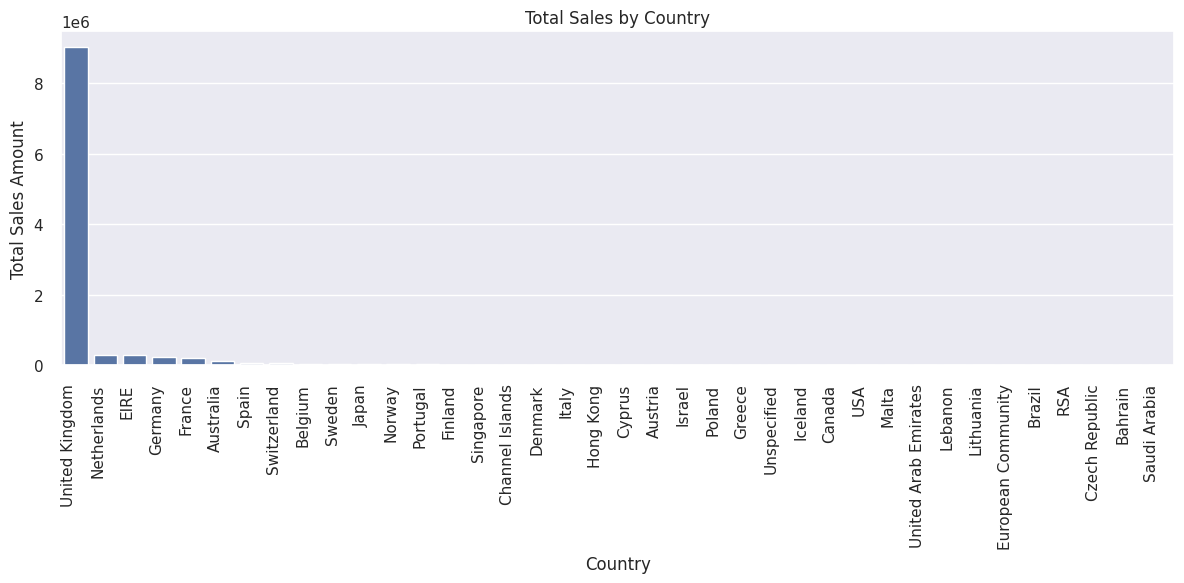

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='amount', data=country_sales)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [97]:
# find difference between first purchase and 2nd purchase
salesgroup['daysreturn']  = salesgroup['InvoiceDate2']- salesgroup['min_date']
salesgroup['daysreturn'] = salesgroup['daysreturn']/np.timedelta64(1,'D')
salesgroup['daysmaxmin']  = salesgroup['max_date']- salesgroup['min_date']
salesgroup['daysmaxmin'] = (salesgroup['daysmaxmin']/np.timedelta64(1,'D')) + 1
salesgroup

,CustomerID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,avgordervalue,itemsperbasket,InvoiceDate2,daysreturn,daysmaxmin
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,77183.600000,74215.000000,NaT,NaN,1.000000
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,615.714286,351.142857,2011-04-07 10:43:00,120.823611,366.038194
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,449.310000,585.250000,2011-01-25 10:42:00,39.647917,283.752778
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,1757.550000,631.000000,NaT,NaN,1.000000
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,334.400000,197.000000,NaT,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,80.820000,54.000000,NaT,NaN,1.000000
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,89.025000,51.500000,NaT,NaN,119.922222
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,130.930000,87.312500,2011-01-23 14:58:00,17.030556,334.908333
4338,18287.0,United Kingdom,104.55,1586,2011-10-28 09:29:00,2011-05-22 10:39:00,3,1.493571,1837.28,70,612.426667,528.666667,2011-10-12 10:23:00,142.988889,159.951389


#RFM Calculation
Frequency=Number of ordersLast purchase date/First purchase date
  (1)

Recency=Last date of period − Last purchase date
  (2)

In [98]:
#calculate Frequency and Recency
salesgroup['frequency'] = np.where(salesgroup['count_order'] >1,salesgroup['count_order']/salesgroup['daysmaxmin'],0)
salesgroup['recency']  = maxdate- salesgroup['max_date']
salesgroup['recency'] = salesgroup['recency']/np.timedelta64(1,'D')
salesgroup

,CustomerID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,avgordervalue,itemsperbasket,InvoiceDate2,daysreturn,daysmaxmin,frequency,recency
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,77183.600000,74215.000000,NaT,NaN,1.000000,0.000000,325.117361
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,615.714286,351.142857,2011-04-07 10:43:00,120.823611,366.038194,0.019124,1.873611
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,449.310000,585.250000,2011-01-25 10:42:00,39.647917,283.752778,0.014097,74.984028
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,1757.550000,631.000000,NaT,NaN,1.000000,0.000000,18.124306
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,334.400000,197.000000,NaT,NaN,1.000000,0.000000,309.867361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,80.820000,54.000000,NaT,NaN,1.000000,0.000000,180.081250
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,89.025000,51.500000,NaT,NaN,119.922222,0.016677,7.046528
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,130.930000,87.312500,2011-01-23 14:58:00,17.030556,334.908333,0.047774,3.033333
4338,18287.0,United Kingdom,104.55,1586,2011-10-28 09:29:00,2011-05-22 10:39:00,3,1.493571,1837.28,70,612.426667,528.666667,2011-10-12 10:23:00,142.988889,159.951389,0.018756,42.139583


In [99]:

salesgroup.describe(include='all')

,CustomerID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,avgordervalue,itemsperbasket,InvoiceDate2,daysreturn,daysmaxmin,frequency,recency
count,4340.000000,4340,4340.000000,4340.000000,4340,4340,4340.00000,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,2712,2712.000000,4340.000000,4340.000000,4340.000000
unique,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15319.452765,NaN,477.292114,1302.179263,2011-09-08 12:35:25.935483904,2011-04-30 17:26:20.101382656,4.68871,4.465665,2.457761e+03,122.404839,420.198783,256.747862,2011-06-11 23:51:45.597345280,80.223001,131.797984,0.058844,92.010116
min,12346.000000,NaN,0.000000,1.000000,2010-12-01 09:53:00,2010-12-01 08:26:00,1.00000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,2010-12-01 08:28:00,0.000694,1.000000,0.000000,0.000000
25%,13812.750000,NaN,51.702500,160.000000,2011-07-21 05:22:00,2011-01-17 11:11:15,1.00000,2.203450,3.073225e+02,17.000000,178.512500,93.000000,2011-03-08 13:02:30,21.104688,1.000000,0.000000,17.067187
50%,15299.500000,NaN,127.290000,379.000000,2011-10-20 10:52:00,2011-04-05 09:52:30,2.00000,2.917611,6.744850e+02,41.000000,294.439167,162.000000,2011-06-07 12:53:30,54.975694,93.949653,0.015627,50.081944
75%,16779.250000,NaN,294.730000,993.000000,2011-11-22 11:13:15,2011-08-19 10:52:15,5.00000,3.830204,1.661950e+03,100.000000,430.785714,272.525000,2011-09-28 11:04:45,117.037326,253.026215,0.031259,141.311111
max,99999.000000,NaN,831447.160000,469762.000000,2011-12-09 12:50:00,2011-12-09 12:16:00,1905.00000,2033.100000,1.755277e+06,133313.000000,84236.250000,74215.000000,2011-12-09 09:15:00,364.918056,374.096528,14.395638,373.122917


#RFM Calculation
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool. Unless using specialized software, it’s recommended to divide the customers into four tiers for each dimension, such that each customer will be assigned to one tier in each dimension:

Recency R-Tier-1 (most recent) R-Tier-2 R-Tier-3 R-Tier-4 (least recent)

Frequency F-Tier-1 (most frequent) F-Tier-2 F-Tier-3 F-Tier-4 (only one transaction)

Monetary M-Tier-1 (highest spend) M-Tier-2 M-Tier-3 M-Tier-4 (lowest spend)

This results in 64 distinct customer segments (4x4x4), into which customers will be segmented. Three tiers can also be used (resulting in 27 segments); using more than four, however, is not recommended (because the difficulty in use outweighs the small benefit gain from the extra granularity).

As mentioned above, more sophisticated and less manual approaches – such as k-means cluster analysis – can be performed by software, resulting in groups of customers with more homogeneous characteristics.

In [100]:
# Now we have the values for Recency, Frequency and Monetary parameters. Each customer will get a note between 1 and 4 for each parameter.
#By Applying quantile method we group each quantile into 25% of the population.

#so letsdefine the quantile and save it ina dictionary
quintiles = salesgroup[['recency', 'frequency', 'monetary']].quantile([.25, .50, .75]).to_dict()
quintiles2 = salesgroup[['recency', 'frequency', 'monetary']].quantile([.2, .4, 0.6, .8]).to_dict()
quintiles

{'recency': {0.25: 17.0671875,
  0.5: 50.081944444444446,
  0.75: 141.3111111111111},
 'frequency': {0.25: 0.0,
  0.5: 0.015627261340166527,
  0.75: 0.03125941250428669},
 'monetary': {0.25: 307.3225, 0.5: 674.485, 0.75: 1661.95}}

In [101]:
# Create a fuction that assign ranks from 1 to 4.
# A smaller Recency value is better
# For Frequency and Monetary values, a Higher value is better.
# so we have two different functions.

In [102]:
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 4
    elif x <= quintiles['recency'][.50]:
        return 3
    elif x <= quintiles['recency'][.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.25]:
        return 1
    elif x <= quintiles[c][.50]:
        return 2
    elif x <= quintiles[c][.75]:
        return 3
    else:
        return 4

In [103]:
#lets get the RFM values by calling the function above

salesgroup['R'] = salesgroup['recency'].apply(lambda x: r_score(x))
salesgroup['F'] = salesgroup['frequency'].apply(lambda x: fm_score(x, 'frequency'))
salesgroup['M'] = salesgroup['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [104]:
salesgroup['RFM Score'] = salesgroup['R'].map(str) + salesgroup['F'].map(str) + salesgroup['M'].map(str)
salesgroup['RFM Score'] = salesgroup['RFM Score'].astype(int)

#RFM for Marketing Communication purpose

The third step is to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.

It is helpful to assign names to segments of interest. Here are just a few examples to illustrate:

Best Customers – This group consists of those customers who are found in R-Tier-1, F-Tier-1 and M-Tier-1, meaning that they transacted recently, do so often and spend more than other customers. A shortened notation for this segment is 1-1-1; we’ll use this notation going forward.

High-spending New Customers – This group consists of those customers in 1-4-1 and 1-4-2. These are customers who transacted only once, but very recently and they spent a lot.

Lowest-Spending Active Loyal Customers – This group consists of those customers in segments 1-1-3 and 1-1-4 (they transacted recently and do so often, but spend the least).

Churned Best Customers – This segment consists of those customers in groups 4-1-1, 4-1-2, 4-2-1 and 4-2-2 (they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted).

Marketers should assemble groups of customers most relevant for their particular business objectives and retention goals.

In [105]:
pd.DataFrame(salesgroup.dtypes, columns=['Type'])
salesgroup['RFM Score'] = salesgroup['RFM Score'].astype(int)

In [106]:
def rrr(salesgroup):
    if salesgroup['RFM Score'] == 111 :
        d = 'Best Customers'
    elif salesgroup['RFM Score'] == 112 :
        d = 'High Spending New Customers'
    elif salesgroup['RFM Score'] == 113 :
        d = 'Lowest Spending Active Lyal Customers'
    elif salesgroup['RFM Score'] == 114 :
        d = 'Lowest Spending Active Lyal Customers'
    elif salesgroup['RFM Score'] == 422 :
        d = 'Churned Best Customers'
    elif salesgroup['RFM Score'] == 421 :
        d = 'Churned Best Customers'
    elif salesgroup['RFM Score'] == 412 :
        d = 'Churned Best Customers'
    elif salesgroup['RFM Score'] == 411 :
        d = 'Churned Best Customers'
    else:
        d = 'Unclassed'
    return d

salesgroup['comms_label'] = salesgroup.apply(rrr, axis=1)
salesgroup

,CustomerID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,...,InvoiceDate2,daysreturn,daysmaxmin,frequency,recency,R,F,M,RFM Score,comms_label
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,...,NaT,NaN,1.000000,0.000000,325.117361,1,1,4,114,Lowest Spending Active Lyal Customers
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,...,2011-04-07 10:43:00,120.823611,366.038194,0.019124,1.873611,4,3,4,434,Unclassed
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,...,2011-01-25 10:42:00,39.647917,283.752778,0.014097,74.984028,2,2,4,224,Unclassed
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,...,NaT,NaN,1.000000,0.000000,18.124306,3,1,4,314,Unclassed
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,...,NaT,NaN,1.000000,0.000000,309.867361,1,1,2,112,High Spending New Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,...,NaT,NaN,1.000000,0.000000,180.081250,1,1,1,111,Best Customers
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,...,NaT,NaN,119.922222,0.016677,7.046528,4,3,1,431,Unclassed
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,...,2011-01-23 14:58:00,17.030556,334.908333,0.047774,3.033333,4,4,4,444,Unclassed
4338,18287.0,United Kingdom,104.55,1586,2011-10-28 09:29:00,2011-05-22 10:39:00,3,1.493571,1837.28,70,...,2011-10-12 10:23:00,142.988889,159.951389,0.018756,42.139583,3,3,4,334,Unclassed


With the above classification a marketting team may decide to tailor its communication as follows;

Best Customers – Communications with this group should make them feel valued and appreciated. These customers likely generate a disproportionately high percentage of overall revenues and thus focusing on keeping them happy should be a top priority. Further analyzing their individual preferences and affinities will provide additional opportunities for even more personalized messaging.

High-spending New Customers – It is always a good idea to carefully “incubate” all new customers, but because these new customers spent a lot on their first purchase, it’s even more important. Like with the Best Customers group, it’s important to make them feel valued and appreciated – and to give them terrific incentives to continue interacting with the brand.

Lowest-Spending Active Loyal Customers – These repeat customers are active and loyal, but they are low spenders. Marketers should create campaigns for this group that make them feel valued, and incentivize them to increase their spend levels. As loyal customers, it often also pays to reward them with special offers if they spread the word about the brand to their friends, e.g., via social networks.

Churned Best Customers – These are valuable customers who stopped transacting a long time ago. While it’s often challenging to re-engage churned customers, the high value of these customers makes it worthwhile trying. Like with the Best Customers group, it’s important to communicate with them on the basis of their specific preferences, as known from earlier transaction data.

In [107]:
def www(salesgroup):
    if salesgroup['RFM Score'] == 111 :
        d = 'Core'
    elif salesgroup['F'] == 1 :
        d = 'Loyal'
    elif salesgroup['M'] == 1 :
        d = 'Whales'
    elif salesgroup['F'] == 1 &  salesgroup['M'] == 3:
        d = 'Promising'
    elif salesgroup['F'] == 1 &  salesgroup['M'] == 4:
        d = 'Promising'
    elif salesgroup['R'] == 1 & salesgroup['F'] == 4:
        d = 'Rookies'
    elif salesgroup['R'] == 4 & salesgroup['F'] == 4 :
        d = 'Slipping'
    else:
        d = 'Unclassed'
    return d

salesgroup['sales_label'] = salesgroup.apply(www, axis=1)
salesgroup

,CustomerID,Country,sum_price,sum_quantity,max_date,min_date,count_order,avgitemprice,monetary,count_product,...,daysreturn,daysmaxmin,frequency,recency,R,F,M,RFM Score,comms_label,sales_label
0,12346.0,United Kingdom,1.04,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,77183.60,1,...,NaN,1.000000,0.000000,325.117361,1,1,4,114,Lowest Spending Active Lyal Customers,Loyal
1,12347.0,Iceland,481.21,2458,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2.644011,4310.00,182,...,120.823611,366.038194,0.019124,1.873611,4,3,4,434,Unclassed,Unclassed
2,12348.0,Finland,178.71,2341,2011-09-25 13:13:00,2010-12-16 19:09:00,4,5.764839,1797.24,31,...,39.647917,283.752778,0.014097,74.984028,2,2,4,224,Unclassed,Unclassed
3,12349.0,Italy,605.10,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,8.289041,1757.55,73,...,NaN,1.000000,0.000000,18.124306,3,1,4,314,Unclassed,Loyal
4,12350.0,Norway,65.30,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,3.841176,334.40,17,...,NaN,1.000000,0.000000,309.867361,1,1,2,112,High Spending New Customers,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,18281.0,United Kingdom,39.36,54,2011-06-12 10:53:00,2011-06-12 10:53:00,1,5.622857,80.82,7,...,NaN,1.000000,0.000000,180.081250,1,1,1,111,Best Customers,Core
4336,18282.0,United Kingdom,62.39,103,2011-12-02 11:43:00,2011-08-05 13:35:00,2,5.199167,178.05,12,...,NaN,119.922222,0.016677,7.046528,4,3,1,431,Unclassed,Whales
4337,18283.0,United Kingdom,1220.93,1397,2011-12-06 12:02:00,2011-01-06 14:14:00,16,1.614987,2094.88,756,...,17.030556,334.908333,0.047774,3.033333,4,4,4,444,Unclassed,Slipping
4338,18287.0,United Kingdom,104.55,1586,2011-10-28 09:29:00,2011-05-22 10:39:00,3,1.493571,1837.28,70,...,142.988889,159.951389,0.018756,42.139583,3,3,4,334,Unclassed,Unclassed


Another perspective of RFM or customer segmentation is to increase Sales. By applying the following scoring system as stated on https://www.barilliance.com/rfm-analysis/

Core - Your Best Customers RFM Score: 111

Who They Are: Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.

Marketing Strategies: Focus on loyalty programs and new product introductions. These customers have proven to have a higher willingness to pay, so don't use discount pricing to generate incremental sales. Instead, focus on value added offers through product recommendations based on previous purchases.

Loyal - Your Most Loyal Customers RFM Score: X1X

Who They Are: Customers who buy the most often from your store.

Marketing Strategies: Loyalty programs are effective for these repeat visitors. Advocacy programs and reviews are also common X1X strategies. Lastly, consider rewarding these customers with Free Shipping or other like benefits.

Whales - Your ​Highest Paying Customers RFM Score: XX1

Who They Are: Customers who have generated the most revenue for your store.

Marketing Strategies: These customers have demonstrated a high willingness to pay. Consider premium offers, subscription tiers, luxury products, or value add cross/up-sells to increase AOV. Don't waste margin on discounts.

Promising - Faithful customers RFM Score: X13, X14

Who They Are: Customers who return often, but do not spend a lot.

Marketing Strategies: You've already succeeded in creating loyalty. Focus on increasing monetization through product recommendations based on past purchases and incentives tied to spending thresholds (pegged to your store AOV).

Rookies - Your Newest Customers RFM Score: 14X

Who They Are: First time buyers on your site.

Marketing Strategies: Most customers never graduate to loyal. Having clear strategies in place for first time buyers such as triggered welcome emails will pay dividends.

Slipping - ​Once Loyal, Now Gone RFM Score: 44X

Who They Are: Great past customers who haven't bought in awhile.

Marketing Strategies: Customers leave for a variety of reasons. Depending on your situation price deals, new product launches, or other retention strategies.

Distribution of Recency, Frequency and Monetary Recency distribution is right-skewed, showing that the majority of customers made a purchase in the recent past. It has a long tail containing single customers who made their order long time ago.

Both frequency and monetary distributions are bimodal (with two different peaks - modes). The chart reveals that one group of customers has low frequency (small number of orders, around 10 per customer) and another group is much more "loyal" (with around 50 purchases per customer). When it comes to monetary, it follows similar pattern. Part of customers have only spent little amount of money but there is another (significant in size) group that have spent much more.

Frequency and monetary distributions suggest that there are visible differences between different groups of customers. By looking at the distribution of three the biggest segments: "loyal customers", "hibernating", "potential loyalist" it's easy to see that indeed they build up different parts of total distribution, eg. hibernating customers are responsible for first monetary peak and loyal customers for the second peak.

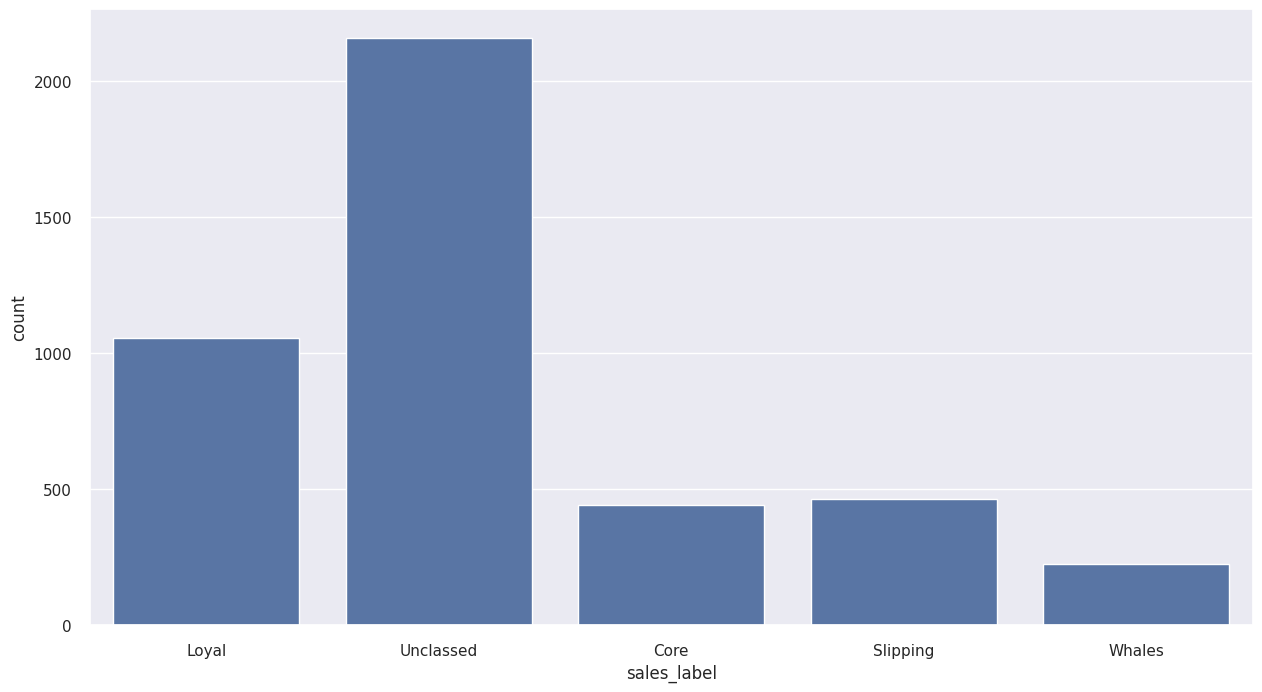

In [108]:
## Quick Plot of the count of customer ID in various classification based on the first instance which was Marketting

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

sns.set(style="darkgrid")
ax = sns.countplot(x="sales_label", data=salesgroup)

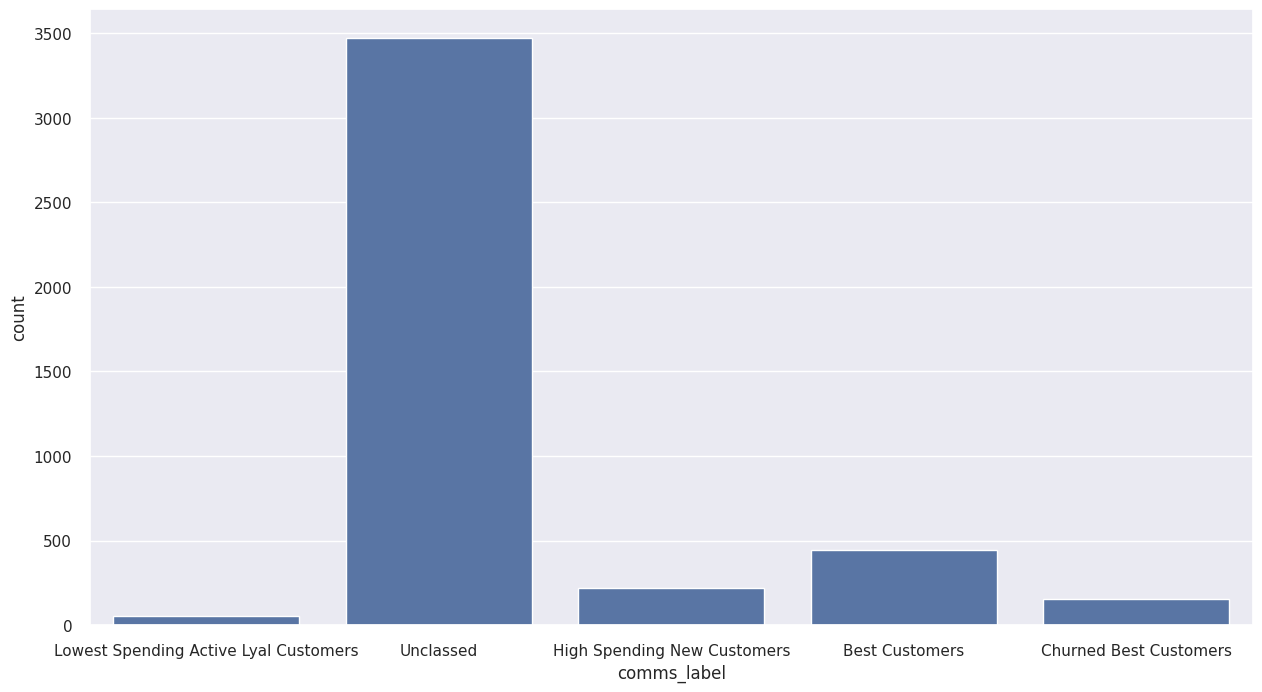

In [109]:
## Quick Plot of the count of customer ID in various classification based on the second instance which is customer Insight
ax = sns.countplot(x="comms_label", data=salesgroup)

#A change of Approach¶
This doesnt look right, so lets review our RFM class methods. Create a fuction that assign ranks from 1 to 5 A smaller Recency value is better For Frequency and Monetary values, a Higher value is better. so we have two different functions.

In [110]:
#so letsdefine the quantile and save it ina dictionary
quintiles2 = salesgroup[['recency', 'frequency', 'monetary']].quantile([.2, .4, 0.6, .8]).to_dict()

def r_score2(y):
    if y <= quintiles2['recency'][.2]:
        return 1
    elif y <= quintiles2['recency'][.4]:
        return 2
    elif y <= quintiles2['recency'][.6]:
        return 3
    elif y <= quintiles2['recency'][.8]:
        return 4
    else:
        return 5

def fm_score2(y, k):
    if y <= quintiles2[k][.2]:
        return 1
    elif y <= quintiles2[k][.4]:
        return 2
    elif y <= quintiles2[k][.6]:
        return 3
    elif y <= quintiles2[k][.8]:
        return 4
    else:
        return 5

In [111]:
#lets get the RFM values by calling the function above

salesgroup['R2'] = salesgroup['recency'].apply(lambda y: r_score2(y))
salesgroup['F2'] = salesgroup['frequency'].apply(lambda y: fm_score2(y, 'frequency'))
salesgroup['M2'] = salesgroup['monetary'].apply(lambda y: fm_score2(y, 'monetary'))

salesgroup['RFM Score2'] = salesgroup['R2'].map(str) + salesgroup['F2'].map(str) + salesgroup['M2'].map(str)
salesgroup['RFM Score2'] = salesgroup['RFM Score2'].astype(int)

##So lets group the customersinto 11 based on RFM scores.

#A quick breakdown of the new cluster
category R F&M

Champions 4-5 4-5

Loyal Customers 2-5 3-5

Potential Loyalist 3-5 1-3

Recent Customers 4-5 0-1

Promising 3-4 0-1

Customers Needing Attention 2-3 2-3

About To Sleep 2-3 0-2

At Risk 0-2 2-5

Can’t Lose Them 0-1 4-5

Hibernating 1-2 1-2

Lost 0-2 0-2

In [112]:
def mapl(salesgroup, r_rule, fm_rule, label, colname='new_label'):
    salesgroup.loc[(salesgroup['R2'].between(r_rule[0], r_rule[1]))
            & (salesgroup['F2'].between(fm_rule[0], fm_rule[1])), colname] = label
    return salesgroup

salesgroup['new_label'] = ''

salesgroup = mapl(salesgroup, (4,5), (4,5), 'Champions')
salesgroup = mapl(salesgroup, (2,5), (3,5), 'Loyal customers')
salesgroup = mapl(salesgroup, (3,5), (1,3), 'Potential loyalist')
salesgroup = mapl(salesgroup, (4,5), (0,1), 'New customers')
salesgroup = mapl(salesgroup, (3,4), (0,1), 'Promising')
salesgroup = mapl(salesgroup, (2,3), (2,3), 'Needing attention')
salesgroup = mapl(salesgroup, (2,3), (0,2), 'About to sleep')
salesgroup = mapl(salesgroup, (0,2), (2,5), 'At risk')
salesgroup = mapl(salesgroup, (0,1), (4,5), 'Cant loose them')
salesgroup = mapl(salesgroup, (1,2), (1,2), 'Hibernating')
salesgroup = mapl(salesgroup, (0,2), (0,2), 'Lost')

In [113]:
customercategory = salesgroup.groupby('new_label').agg(
    count=('CustomerID', 'count'))

customercategory.reset_index(inplace = True)
customercategory.columns.values

array(['new_label', 'count'], dtype=object)

In [114]:
!pip install squarify

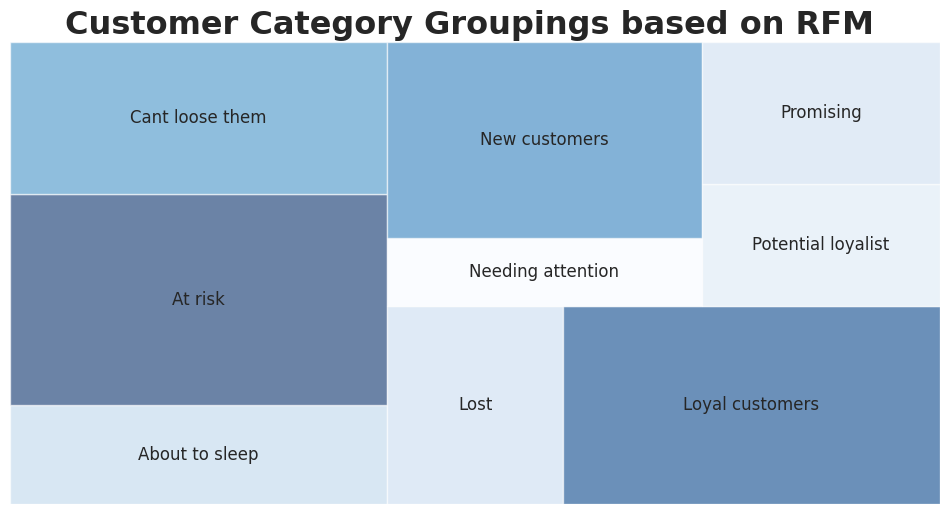

In [115]:
# lets visualise the new cluster
import squarify

#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(customercategory['count']), vmax=max(customercategory['count']))
colors = [matplotlib.cm.Blues(norm(value)) for value in customercategory['count']]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 6)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=customercategory['new_label'],sizes= customercategory['count'], color = colors, alpha=.6)
plt.title("Customer Category Groupings based on RFM ",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

The categories looks more like it, So lets examine other KPI metrices that can be of importance from this

In [116]:
sales_df = salesgroup.drop(columns=['max_date','min_date', 'R', 'F', 'M' ])

In [117]:
# Get the 10 RFM score with the most customers
Top10_RFM = salesgroup['RFM Score2'].value_counts()[:10].index.tolist()
Top10_RFM

[511, 155, 512, 411, 145, 311, 245, 412, 312, 234]

In [118]:
sakesviz = salesgroup[['CustomerID', 'Country', 'monetary','frequency','count_product']]
#top ten frequent buyer
sakesviz.nlargest(10,'frequency')

,CustomerID,Country,monetary,frequency,count_product
4017,17850.0,United Kingdom,5391.21,14.395638,297
4339,99999.0,United Kingdom,1755276.64,5.094396,133313
2768,16120.0,United Kingdom,1309.14,3.966942,30
2627,15920.0,United Kingdom,167.50,3.958763,60
4229,18139.0,United Kingdom,8438.34,3.226288,159
2679,16000.0,United Kingdom,12393.70,2.993763,9
2012,15098.0,United Kingdom,39916.50,2.977257,3
3798,17545.0,United Kingdom,645.96,2.967033,145
1983,15060.0,United Kingdom,303.09,2.011173,121
51,12410.0,Switzerland,693.33,1.998612,26


In [119]:
#top ten volume of Item buyer
sakesviz.nlargest(10, 'count_product')

,CustomerID,Country,monetary,frequency,count_product
4339,99999.0,United Kingdom,1755276.64,5.094396,133313
4011,17841.0,United Kingdom,40991.57,0.332535,7847
1880,14911.0,EIRE,143825.06,0.538765,5677
1290,14096.0,United Kingdom,65164.79,0.172994,5111
326,12748.0,United Kingdom,33719.73,0.564200,4596
1662,14606.0,United Kingdom,12156.65,0.254620,2700
2177,15311.0,United Kingdom,60767.90,0.243253,2379
1690,14646.0,Netherlands,280206.02,0.208989,2080
562,13089.0,United Kingdom,58825.83,0.252758,1818
691,13263.0,United Kingdom,7454.07,0.107727,1677


In [120]:
#Top10_Customer_LTV
sakesviz.nlargest(10,'monetary')

,CustomerID,Country,monetary,frequency,count_product
4339,99999.0,United Kingdom,1755276.64,5.094396,133313
1690,14646.0,Netherlands,280206.02,0.208989,2080
4202,18102.0,United Kingdom,259657.30,0.149539,431
3729,17450.0,United Kingdom,194550.79,0.127717,337
3009,16446.0,United Kingdom,168472.50,0.009710,3
1880,14911.0,EIRE,143825.06,0.538765,5677
55,12415.0,Australia,124914.53,0.063668,716
1334,14156.0,EIRE,117379.63,0.148776,1400
3772,17511.0,United Kingdom,91062.38,0.086023,963
2703,16029.0,United Kingdom,81024.84,0.181536,242


In [121]:
# Summary metrics for the 10 most popular RFM
Top10_RFM_summary = salesgroup[salesgroup['RFM Score2'].isin(Top10_RFM)].groupby('RFM Score2').agg(
    mean_recency=('recency', 'mean'),
    std_recency=('recency', 'std'),
    mean_frequency=('frequency', 'mean'),
    std_frequency=('frequency', 'std'),
    mean_monetary=('monetary', 'mean'),
    std_monetary=('monetary', 'std'),
    samples=('CustomerID', lambda x: len(x)*100/len(salesgroup['new_label']))
).round(2)

Top10_RFM_summary.reset_index(inplace = True)

Top10_RFM_summary

,RFM Score2,mean_recency,std_recency,mean_frequency,std_frequency,mean_monetary,std_monetary,samples
0,145,5.89,3.58,0.03,0.0,3989.71,2851.35,3.11
1,155,4.29,3.45,0.12,0.4,23659.51,122889.88,4.98
2,234,21.88,5.41,0.02,0.0,1391.94,306.98,2.37
3,245,22.29,5.49,0.03,0.0,4174.09,2641.53,2.60
4,311,51.47,10.97,0.00,0.0,160.53,56.53,2.97
5,312,53.15,10.90,0.00,0.0,361.33,59.33,2.40
6,411,124.07,34.08,0.00,0.0,142.25,57.74,3.32
7,412,114.58,34.34,0.00,0.0,345.72,56.17,2.44
8,511,281.51,57.46,0.00,0.0,146.33,57.01,7.67
9,512,277.15,57.52,0.00,0.0,350.05,62.25,4.79


In [122]:
# Summary metrics per RFM Category
Category_summary = salesgroup.groupby('new_label').agg(
    mean_recency=('recency', 'mean'),
    std_recency=('recency', 'std'),
    mean_frequency=('frequency', 'mean'),
    std_frequency=('frequency', 'std'),
    mean_monetary=('monetary', 'mean'),
    std_monetary=('monetary', 'std'),
    samples_percentage=('CustomerID', lambda x: len(x)*100/len(salesgroup['RFM Score2']))
).round(2)

Category_summary.reset_index(inplace = True)
Category_summary

,new_label,mean_recency,std_recency,mean_frequency,std_frequency,mean_monetary,std_monetary,samples_percentage
0,About to sleep,51.80,11.15,0.00,0.00,459.20,503.40,8.69
1,At risk,18.51,8.21,0.05,0.21,2399.22,5316.45,18.53
2,Cant loose them,5.25,3.63,0.09,0.30,10161.26,75626.42,13.36
3,Lost,17.55,8.87,0.00,0.00,980.11,8976.03,8.11
4,Loyal customers,125.25,84.71,0.20,0.72,1752.14,4072.62,17.40
5,Needing attention,50.76,11.36,0.02,0.00,1366.56,1085.65,4.93
6,New customers,278.72,56.64,0.00,0.00,437.32,3095.63,14.35
7,Potential loyalist,125.35,49.36,0.01,0.00,978.78,900.74,6.75
8,Promising,116.67,34.00,0.00,0.00,443.04,568.21,7.88


[15.0, 8.0]


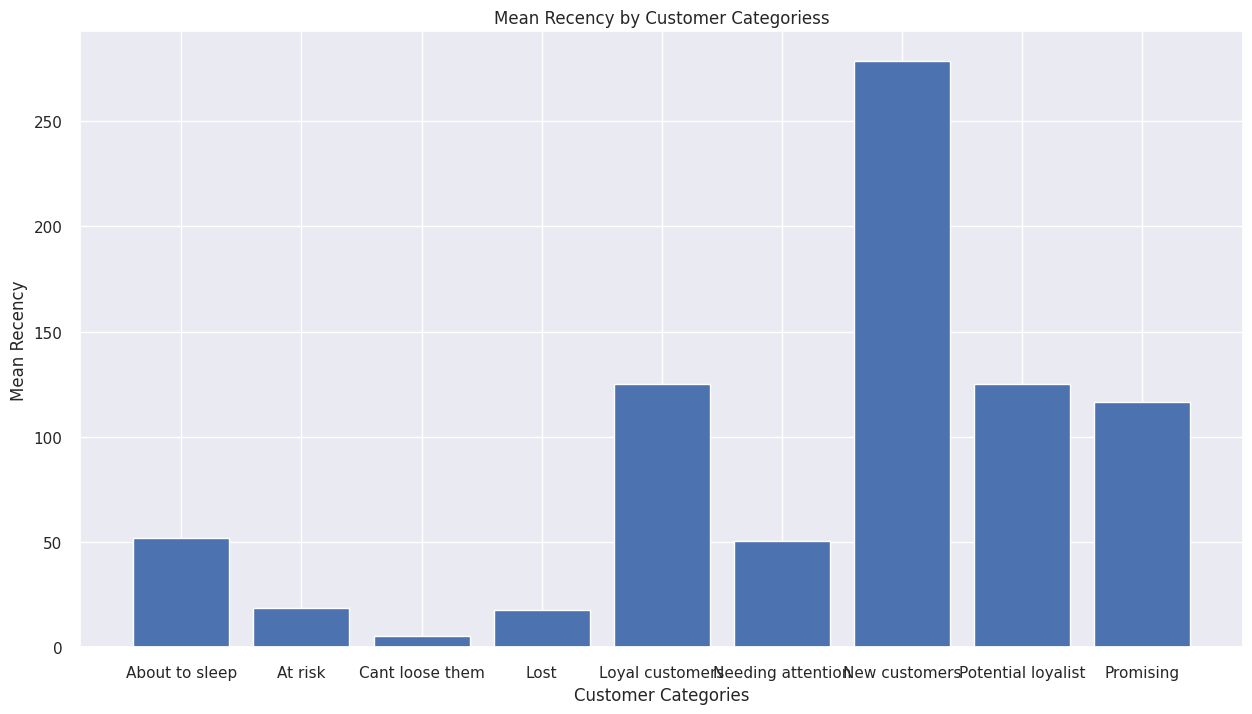

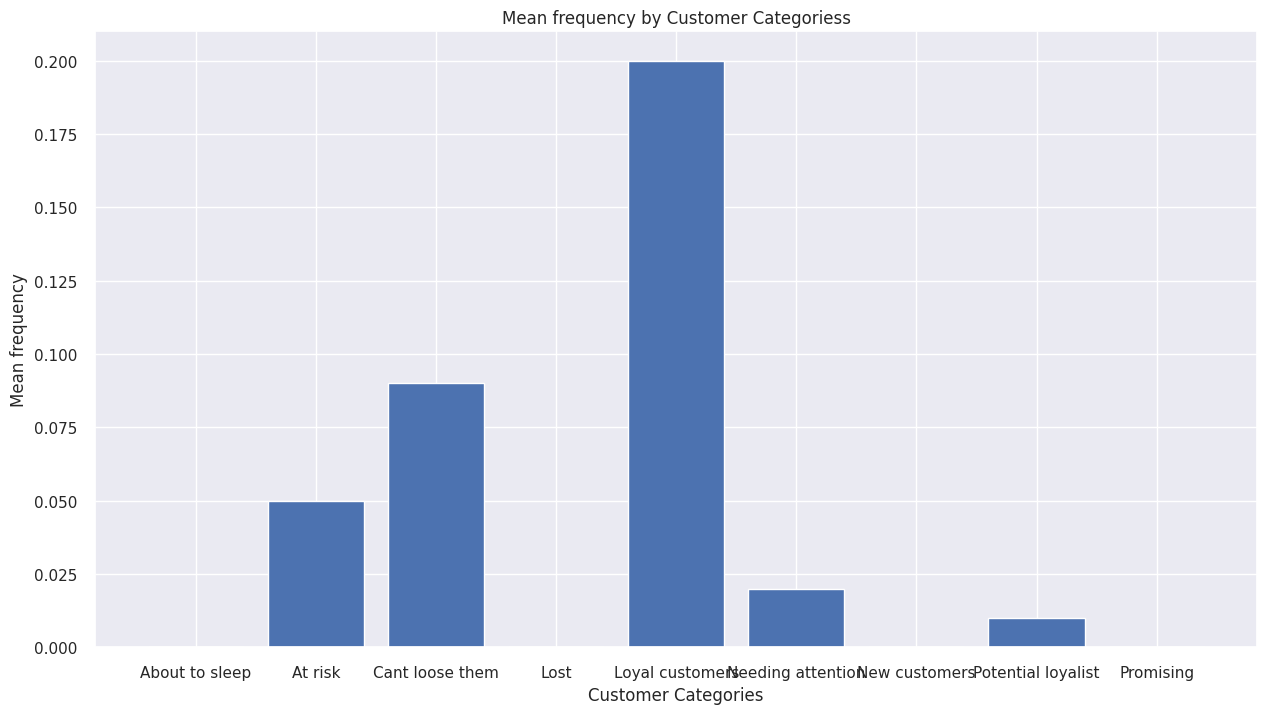

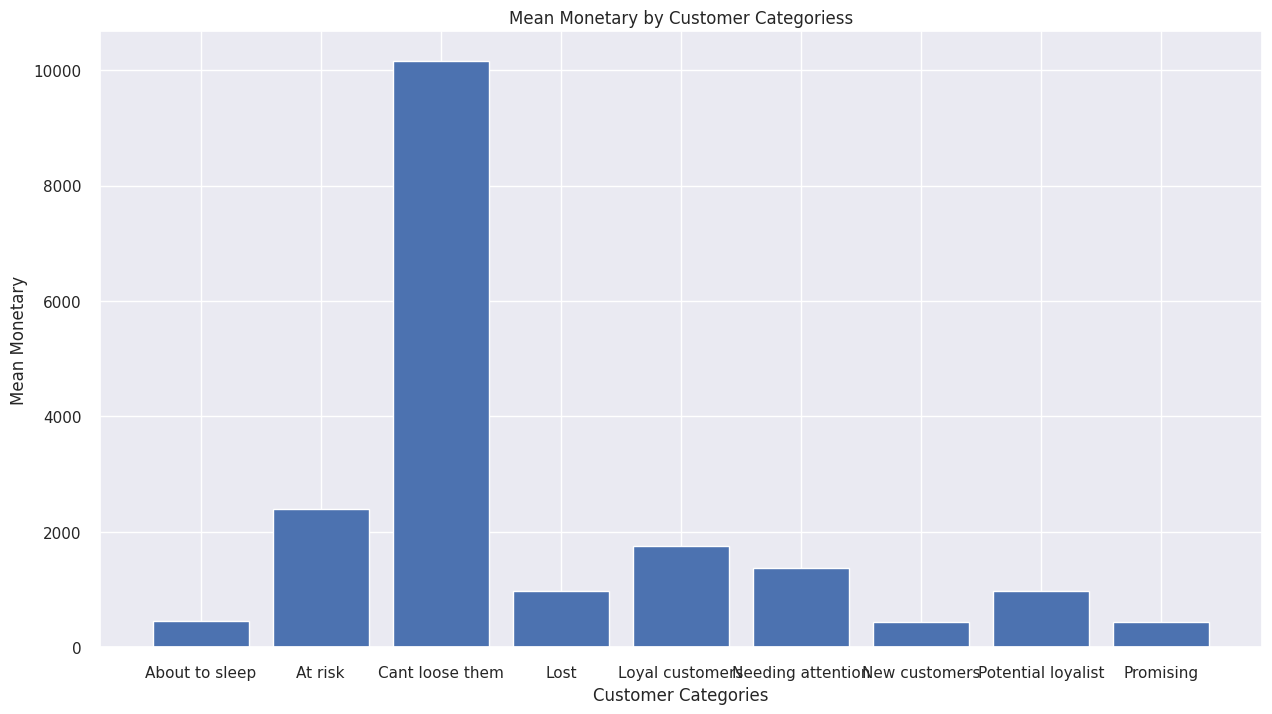

In [123]:
print(plt.rcParams.get('figure.figsize'))


plt.xticks(range(len(Category_summary['mean_recency'])), Category_summary['new_label'])
plt.xlabel('Customer Categories')
plt.ylabel('Mean Recency')
plt.title('Mean Recency by Customer Categoriess')
plt.bar(range(len(Category_summary['mean_recency'])), Category_summary['mean_recency'])
plt.show()


plt.xticks(range(len(Category_summary['mean_frequency'])), Category_summary['new_label'])
plt.xlabel('Customer Categories')
plt.ylabel('Mean frequency')
plt.title('Mean frequency by Customer Categoriess')
plt.bar(range(len(Category_summary['mean_frequency'])), Category_summary['mean_frequency'])
plt.show()

plt.xticks(range(len(Category_summary['mean_monetary'])), Category_summary['new_label'])
plt.xlabel('Customer Categories')
plt.ylabel('Mean Monetary')
plt.title('Mean Monetary by Customer Categoriess')
plt.bar(range(len(Category_summary['mean_monetary'])), Category_summary['mean_monetary'])
plt.show()

In [124]:
customercategory = salesgroup.groupby('new_label').agg(
    count=('CustomerID', 'count'))
customercategory.reset_index(inplace = True)
customercategory

,new_label,count
0,About to sleep,377
1,At risk,804
2,Cant loose them,580
3,Lost,352
4,Loyal customers,755
5,Needing attention,214
6,New customers,623
7,Potential loyalist,293
8,Promising,342


From the charts above, we can conclude that there are other groups that have not been captured by the RFM clusters, perhaps a more sophisticated method like Kmean etc will do a better job.

In [125]:
sales_cleansed = salesgroup[['CustomerID', 'Country', 'sum_price', 'sum_quantity', 'monetary',
        'frequency', 'recency','R2', 'F2', 'M2','RFM Score2', 'new_label']]

<ipython-input-126-940346890ac7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_frequency=sns.distplot(sales_cleansed['F2'], color="#e74c3c")
<ipython-input-126-940346890ac7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_monetary=sns.distplot(sales_cleansed['M2'], color="#3498db")


Text(0.5, 0, 'Customer Attributes')

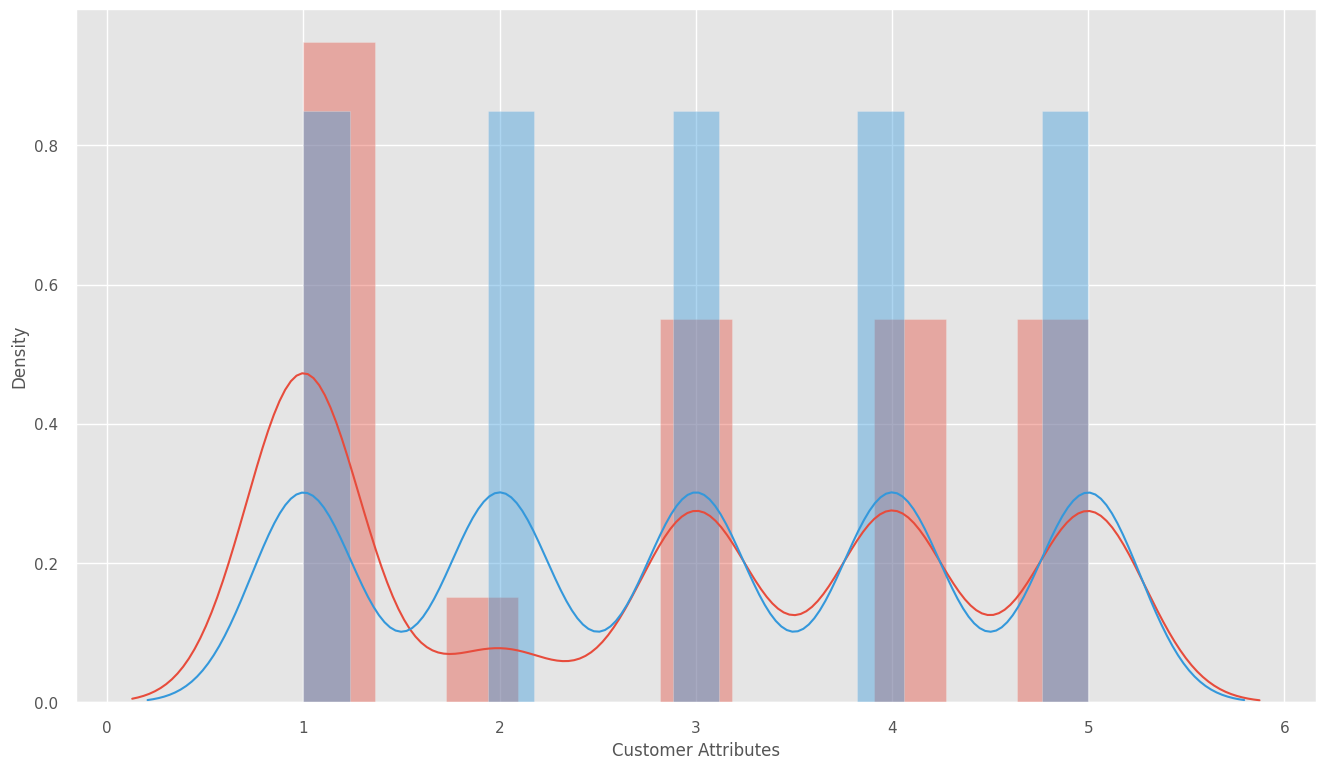

In [126]:
# Plot styling
plt.rcParams['figure.figsize'] = (16, 9)
mpl.style.use('ggplot') # for ggplot-like style
# let us Visualize the existing data
plot_frequency=sns.distplot(sales_cleansed['F2'], color="#e74c3c")
plot_monetary=sns.distplot(sales_cleansed['M2'], color="#3498db")
plt.xlabel('Customer Attributes')

# Prepare data frame with columns for clustering

In [127]:
sales_cl = sales_cleansed[[ 'monetary','frequency', 'recency']] #3 column attributes
sales_cl2 = sales_cleansed[[ 'monetary','frequency']] #2 column attributes

# Scaled data to standardize

In [128]:
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(sales_cl)
sales_scaled = scaler.transform(sales_cl)

scaler.fit(sales_cl2)
sales_scaled2 = scaler.transform(sales_cl2)

#K-means model
K-means works by grouping the points together in such a way that the distance between all the points and the midpoint of the cluster they belong to is minimized.

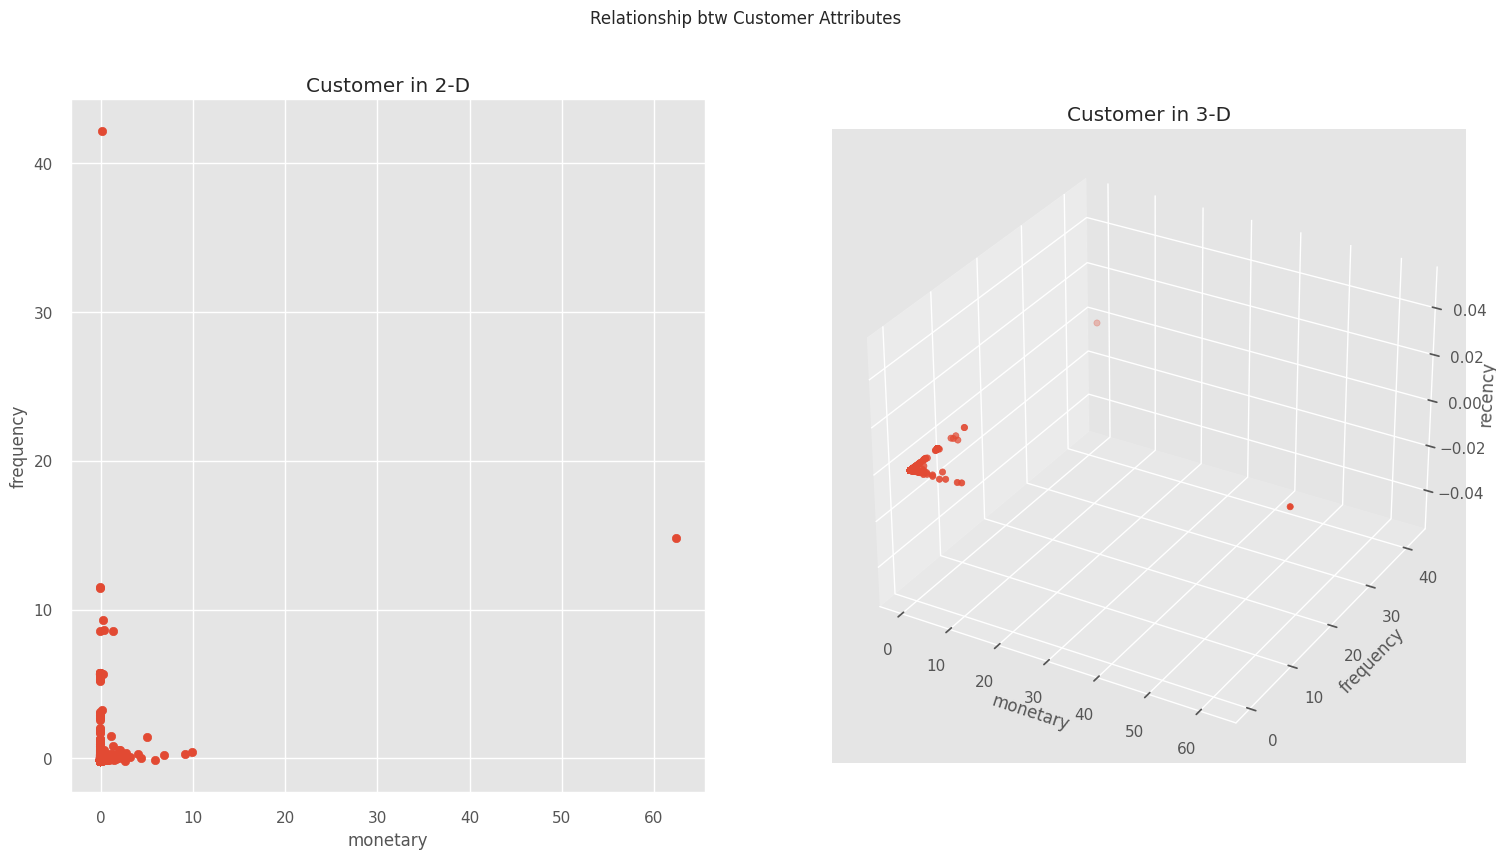

In [129]:
# let visualise a 3-D of the monetary, frequency & recency of each customer
from mpl_toolkits.mplot3d import Axes3D

# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=(18, 9))
fig.suptitle('Relationship btw Customer Attributes')

# First subplot
d2 = fig.add_subplot(1, 2, 1)
d2.scatter(sales_scaled2[:, 0], sales_scaled2[:, 1])
d2.set_xlabel('monetary')
d2.set_ylabel('frequency')
d2.set_title('Customer in 2-D')

# Second subplot
d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(sales_scaled[:, 0], sales_scaled[:, 1]) #, sales_scaled[:, 2]) #, sales_scaled[:, 2])
d3.set_xlabel('monetary')
d3.set_ylabel('frequency')
d3.set_zlabel('recency')
d3.set_title('Customer in 3-D')
plt.show()

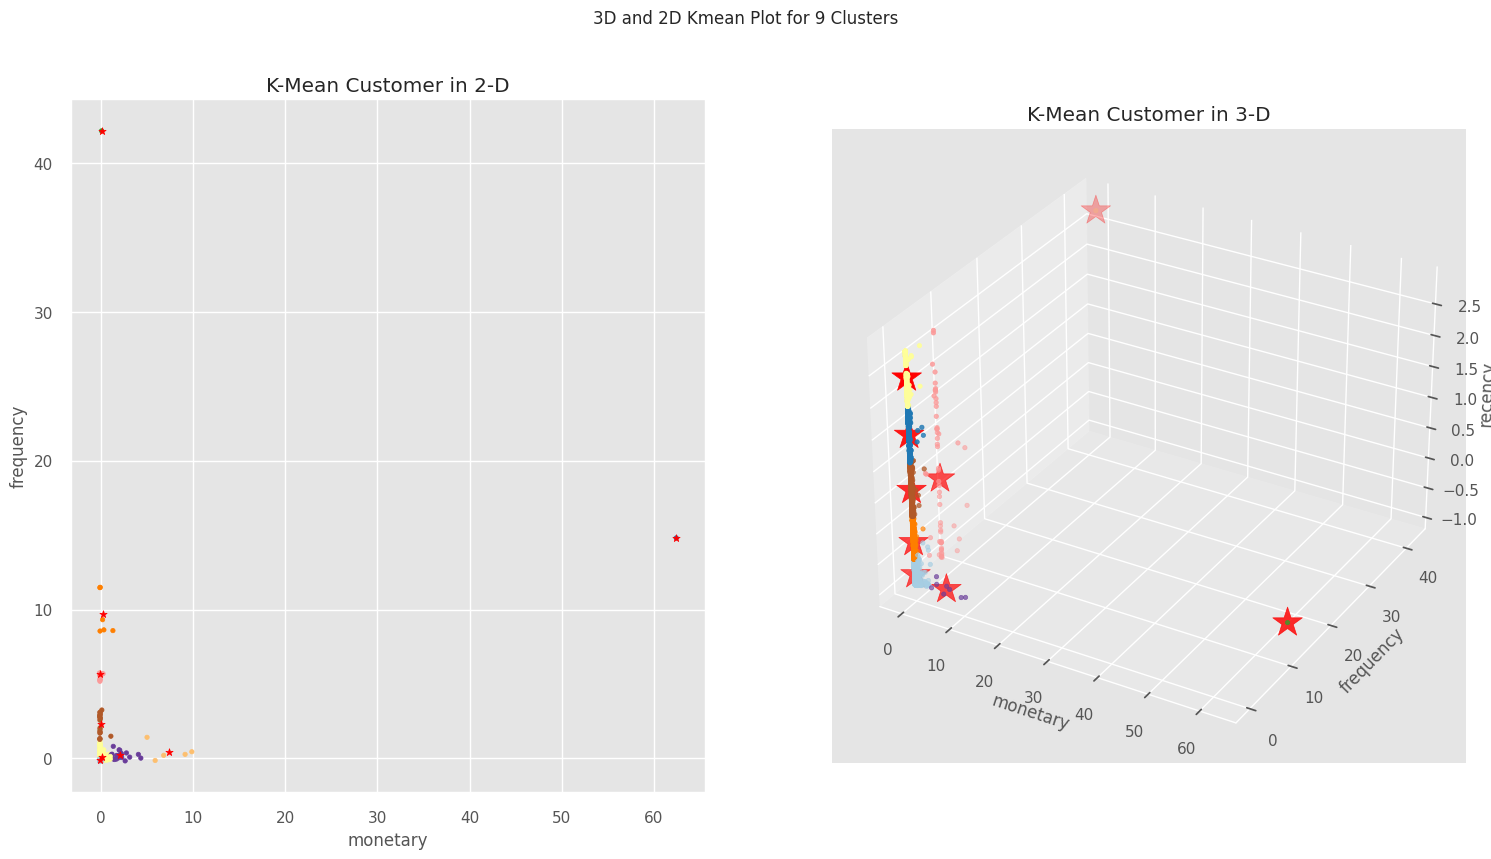

In [130]:
# Initializing K-Means with 9 clusters
kmeans = KMeans(n_clusters=9)
# Fitting with inputs
kmean3D = kmeans.fit(sales_scaled)
# Predicting the clusters
labels3D = kmean3D.predict(sales_scaled)
# Getting the cluster centers
C3D = kmean3D.cluster_centers_
##################################################################################################
kmean2D = kmeans.fit(sales_scaled2)
# Predicting the clusters
labels2D = kmean2D.predict(sales_scaled2)
# Getting the cluster centers
C2D = kmean2D.cluster_centers_

# visualise the 6 cluster k_mean
fig = plt.figure(figsize=(18, 9))
fig.suptitle('3D and 2D Kmean Plot for 9 Clusters')

# First subplot
d2 = fig.add_subplot(1, 2, 1)
d2.scatter(sales_scaled2[:, 0], sales_scaled2[:, 1], c=labels2D, s=10, cmap='Paired')
d2.scatter(C2D[:, 0], C2D[:, 1], marker='*', c='red', s=30)
d2.set_xlabel('monetary')
d2.set_ylabel('frequency')
d2.set_title('K-Mean Customer in 2-D')

# Second subplot
d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(sales_scaled[:, 0], sales_scaled[:, 1], sales_scaled[:, 2], c=labels3D, s=10, cmap='Paired')
d3.scatter(C3D[:, 0], C3D[:, 1], C3D[:, 2], marker='*', c='red', s=500)
d3.set_xlabel('monetary')
d3.set_ylabel('frequency')
d3.set_zlabel('recency')
d3.set_title('K-Mean Customer in 3-D')
plt.show()

#Parameter Tuning for K-Mean to find Optimum Clusters

<Figure size 1200x800 with 0 Axes>

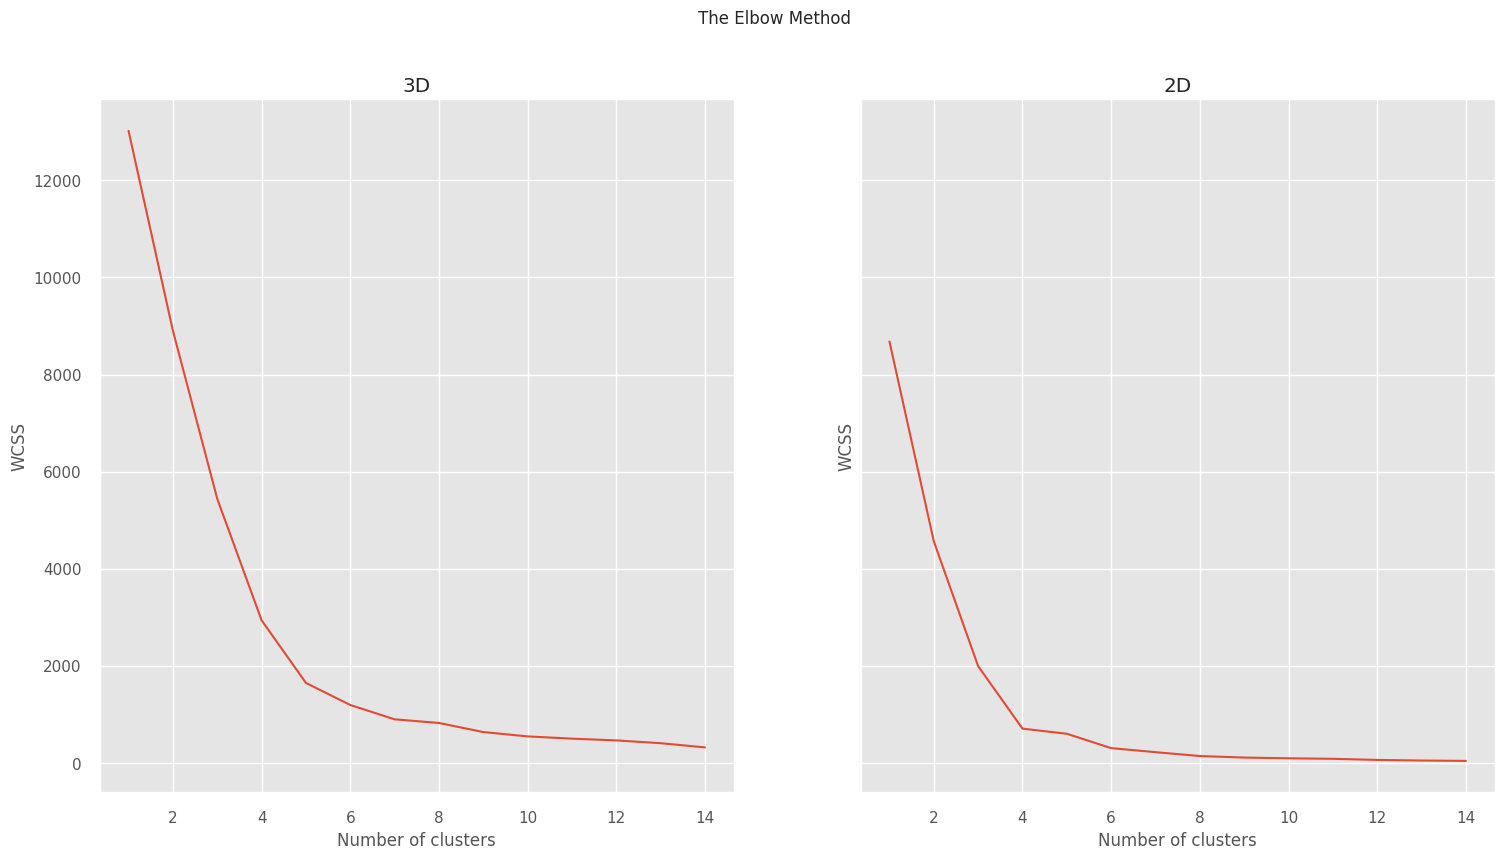

In [131]:
# finding the best number of clusters
# WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.
# by plotting the Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value)
# then we can identify the optimal number of clusters value.
plt.figure(figsize=(12, 8))

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 412)
    kmeans.fit(sales_scaled)
    wcss.append(kmeans.inertia_)
wcss2 = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 412)
    kmeans.fit(sales_scaled2)
    wcss2.append(kmeans.inertia_)


fig, axs = plt.subplots(1, 2, figsize=(18, 9), sharey=True)
fig.suptitle('The Elbow Method')
axs[0].plot(range(1, 15), wcss)
axs[0].set_title('3D')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('WCSS')

axs[1].plot(range(1, 15), wcss2)
axs[1].set_title('2D')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('WCSS')

plt.show()

# Updating K-Means with optimum cluster derived through the elbow method

In [132]:
# Fitting K-Means to the dataset using 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(sales_scaled)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
labels3D=y_kmeans+1
# New Dataframe called cluster
cluster3D = pd.DataFrame(labels3D)
# centroid
C3D = kmeans.cluster_centers_
# Adding cluster to the Dataset1
#sales_cleansed['cluster'] = cluster
#################################################################################################


# Fitting K-Means to the dataset using 4 clusters
kmeans2D = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans2D = kmeans2D.fit_predict(sales_scaled2)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans12D=y_kmeans2D
labels2D=y_kmeans2D+1
# New Dataframe called cluster
cluster2D = pd.DataFrame(labels2D)
# centroid
C2D = kmeans2D.cluster_centers_

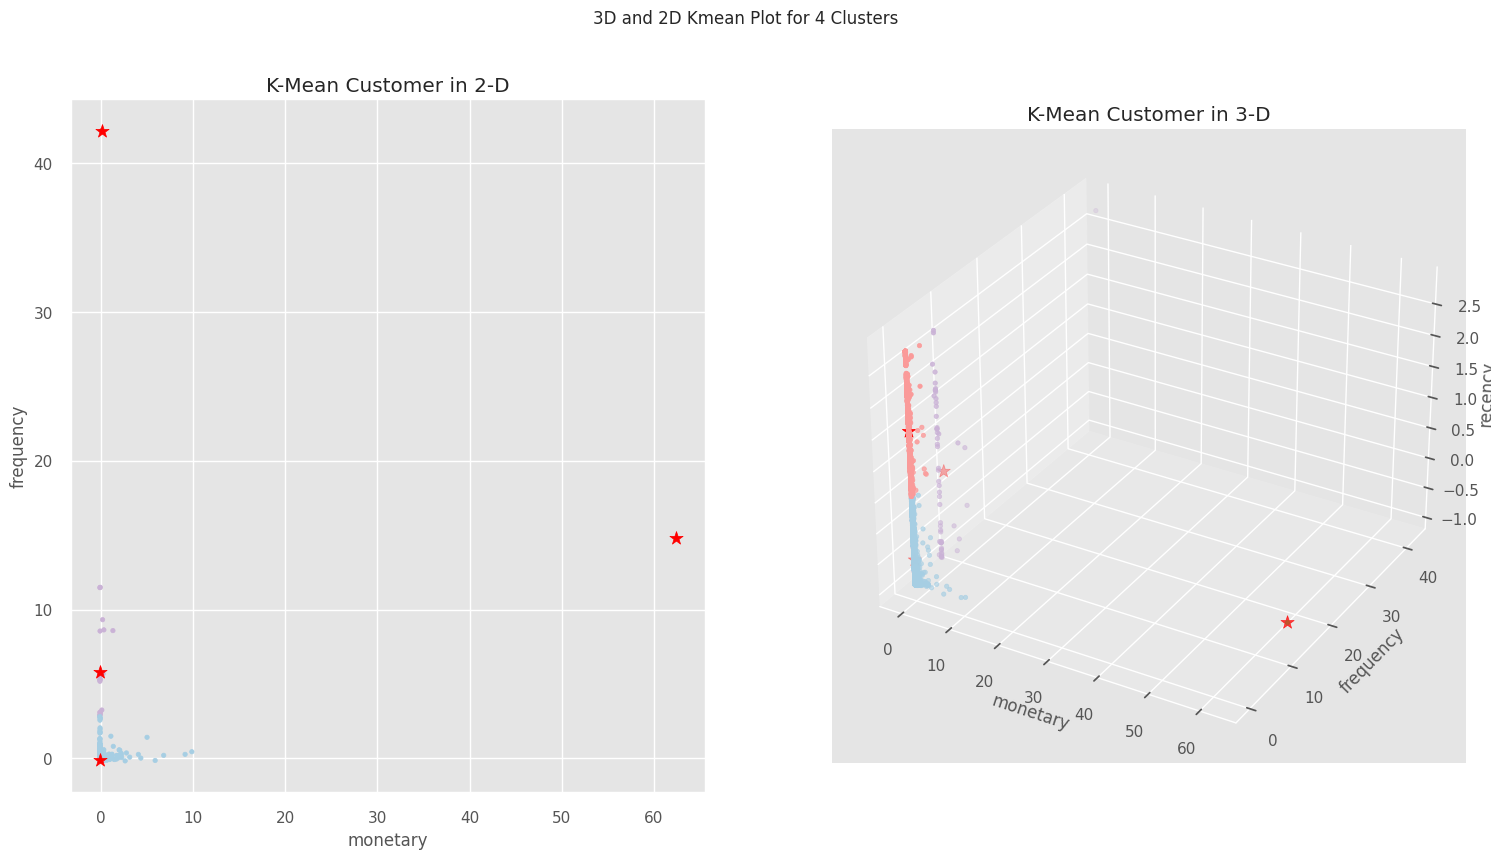

In [133]:
# Plot the output of 4 clusters in 3-Dimension
fig = plt.figure(figsize=(18, 9))
fig.suptitle('3D and 2D Kmean Plot for 4 Clusters')

# First subplot
d2 = fig.add_subplot(1, 2, 1)
d2.scatter(sales_scaled2[:, 0], sales_scaled2[:, 1], c=labels2D, s=10, cmap='Paired')
d2.scatter(C2D[:, 0], C2D[:, 1], marker='*', c='red', s=100)
d2.set_xlabel('monetary')
d2.set_ylabel('frequency')
d2.set_title('K-Mean Customer in 2-D')
# Second subplot
d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(sales_scaled[:, 0], sales_scaled[:, 1], sales_scaled[:, 2], c=labels3D, s=10, cmap='Paired')
d3.scatter(C3D[:, 0], C3D[:, 1], C3D[:, 2], marker='*', c='red', s=100)
d3.set_xlabel('monetary')
d3.set_ylabel('frequency')
d3.set_zlabel('recency')
d3.set_title('K-Mean Customer in 3-D')

plt.show()

#Mean shift clustering algorithm¶
What is Meanshift?
Meanshift is a clustering algorithm that assigns the datapoints to the clusters iteratively by shifting points towards the mode. The mode can be understood as the highest density of datapoints (in the region, in the context of the Meanshift). please refer to http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/ for more info.

In [134]:
# #############################################################################
# Compute clustering with MeanShift default parameter

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(sales_scaled, quantile=0.2, n_samples=5870)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(sales_scaled)
labels3D = msc.labels_
C3D = msc.cluster_centers_
labels_unique = np.unique(labels3D)
n_clusters_ = len(labels_unique)

print("number of estimated meanshift clusters 3D : %d" % n_clusters_)

# #############################################################################

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(sales_scaled2, quantile=0.2, n_samples=5870)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(sales_scaled2)
labels2D = msc.labels_
C2D = msc.cluster_centers_
labels_unique2 = np.unique(labels2D)
n_clusters_2 = len(labels_unique2)

print("number of estimated meanshift clusters 2D : %d" % n_clusters_2)

# #############################################################################

number of estimated meanshift clusters 3D : 31
number of estimated meanshift clusters 2D : 34


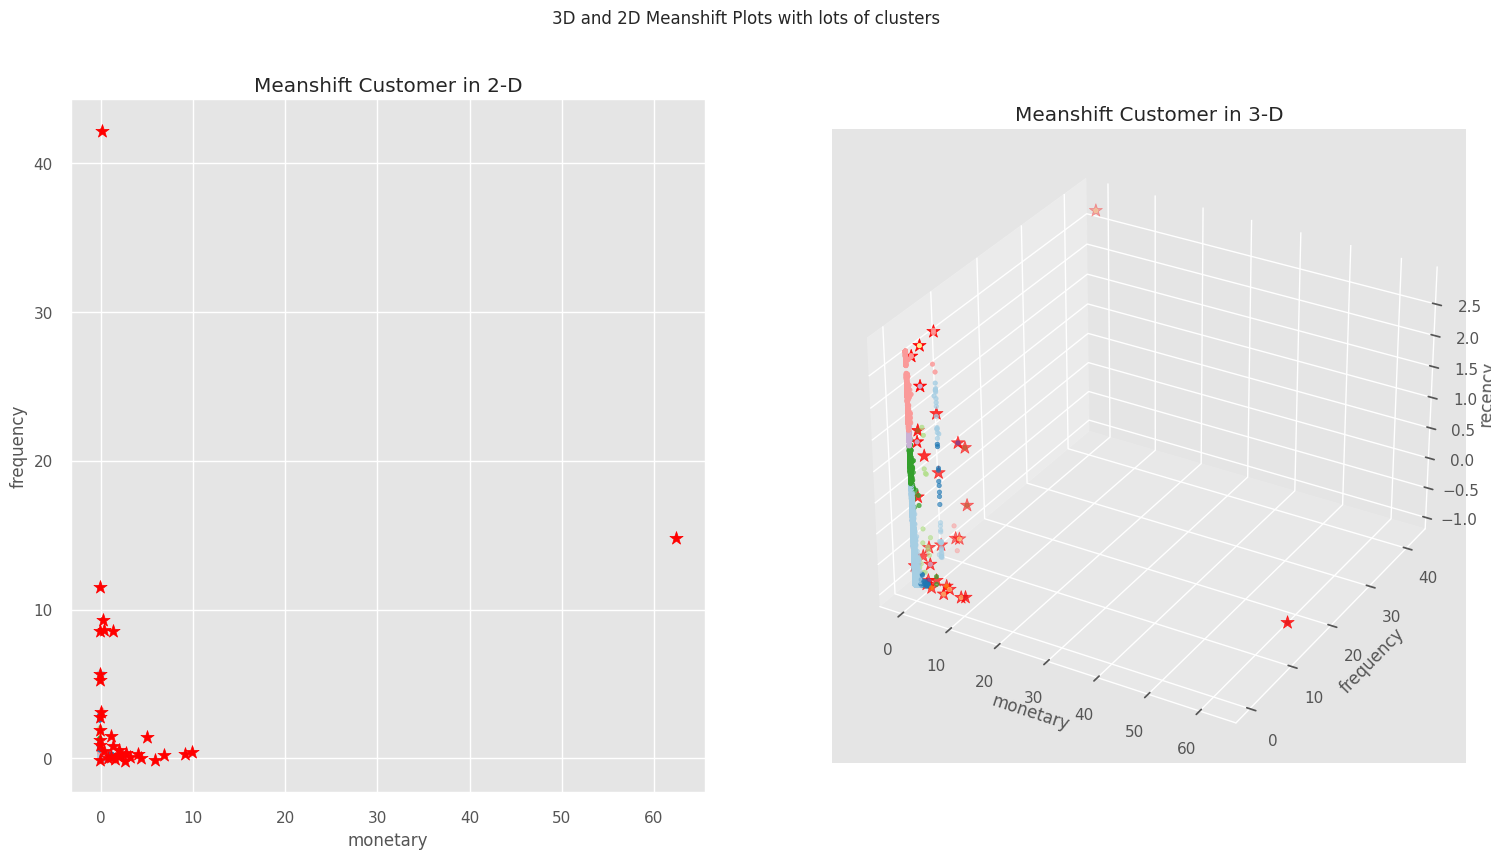

In [135]:
# Plot the output
fig = plt.figure(figsize=(18, 9))
fig.suptitle('3D and 2D Meanshift Plots with lots of clusters')

# First subplot
d2 = fig.add_subplot(1, 2, 1)
d2.scatter(sales_scaled2[:, 0], sales_scaled2[:, 1], c=labels2D, s=10, cmap='Paired')
d2.scatter(C2D[:, 0], C2D[:, 1], marker='*', c='red', s=100)
d2.set_xlabel('monetary')
d2.set_ylabel('frequency')
d2.set_title('Meanshift Customer in 2-D')
# Second subplot
d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(sales_scaled[:, 0], sales_scaled[:, 1], sales_scaled[:, 2], c=labels3D, s=10, cmap='Paired')
d3.scatter(C3D[:, 0], C3D[:, 1], C3D[:, 2], marker='*', c='red', s=100)
d3.set_xlabel('monetary')
d3.set_ylabel('frequency')
d3.set_zlabel('recency')
d3.set_title('Meanshift Customer in 3-D')

plt.show()

43 clusters is too many clusters and impossible to interprete so lets restrict the number of cluster

In [136]:
# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(sales_scaled, quantile=0.9, n_samples=5870)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(sales_scaled)
labels3D = ms.labels_
C3D = ms.cluster_centers_
labels_unique = np.unique(labels3D)
n_clusters_ = len(labels_unique)
print("number of estimated clusters 3D : %d" % n_clusters_)

# #############################################################################

bandwidth = estimate_bandwidth(sales_scaled2, quantile=0.5, n_samples=5870)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(sales_scaled2)
labels2D = ms.labels_
C2D = ms.cluster_centers_
labels_unique2 = np.unique(labels2D)
n_clusters_2 = len(labels_unique2)

print("number of estimated clusters 2D : %d" % n_clusters_2)

# #############################################################################


number of estimated clusters 3D : 6
number of estimated clusters 2D : 33


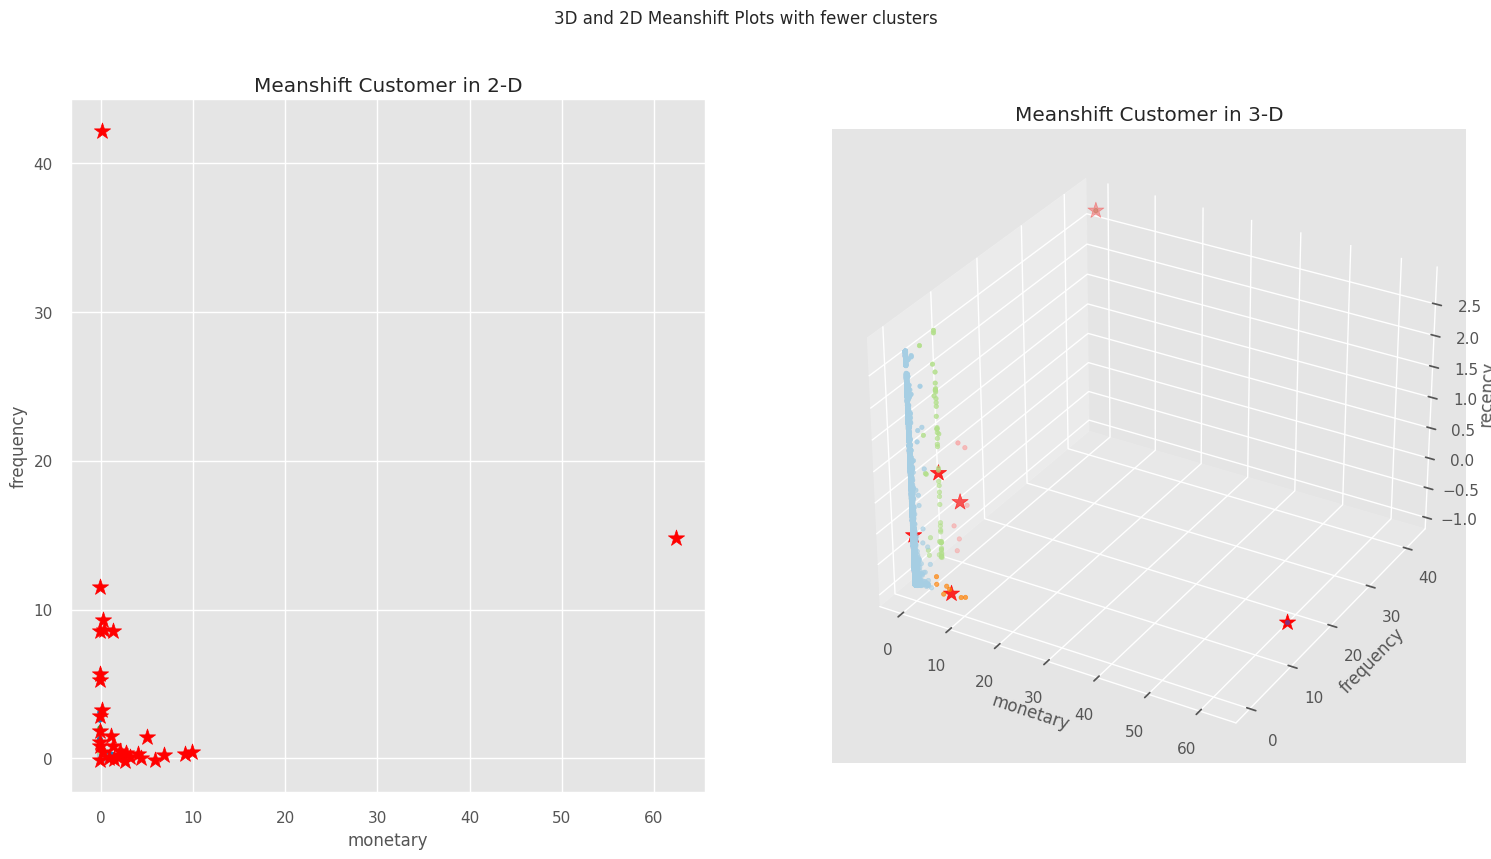

In [137]:
# Plot the output
fig = plt.figure(figsize=(18, 9))
fig.suptitle('3D and 2D Meanshift Plots with fewer clusters')

# First subplot
d2 = fig.add_subplot(1, 2, 1)
d2.scatter(sales_scaled2[:, 0], sales_scaled2[:, 1], c=labels2D, s=10, cmap='Paired')
d2.scatter(C2D[:, 0], C2D[:, 1], marker='*', c='red', s=150)
d2.set_xlabel('monetary')
d2.set_ylabel('frequency')
d2.set_title('Meanshift Customer in 2-D')
# Second subplot
d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(sales_scaled[:, 0], sales_scaled[:, 1], sales_scaled[:, 2], c=labels3D, s=10, cmap='Paired')
d3.scatter(C3D[:, 0], C3D[:, 1], C3D[:, 2], marker='*', c='red', s=150)
d3.set_xlabel('monetary')
d3.set_ylabel('frequency')
d3.set_zlabel('recency')
d3.set_title('Meanshift Customer in 3-D')

plt.show()

#Gaussian Mixture Models¶
A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means:

In [138]:
# Applying the basic GMM model using the previous number of cluster which is 9
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=9).fit(sales_scaled)
labels3D = gmm.predict(sales_scaled)
#######################################################################

gmm = GaussianMixture(n_components=9).fit(sales_scaled2)
labels2D = gmm.predict(sales_scaled2)

#######################################################################

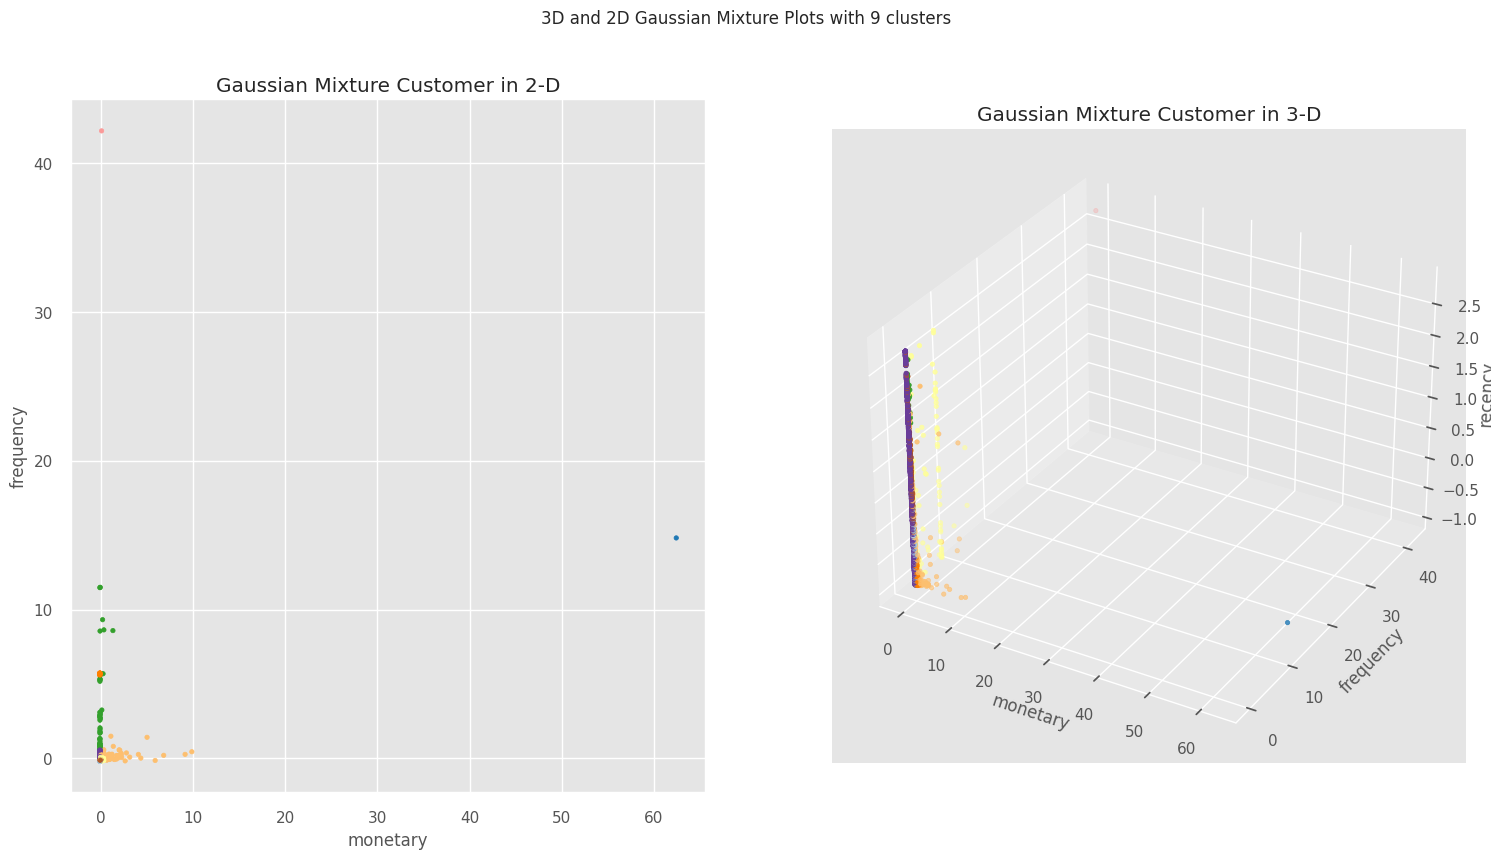

In [139]:
# Plot the output
fig = plt.figure(figsize=(18, 9))
fig.suptitle('3D and 2D Gaussian Mixture Plots with 9 clusters')

# First subplot
d2 = fig.add_subplot(1, 2, 1)
d2.scatter(sales_scaled2[:, 0], sales_scaled2[:, 1], c=labels2D, s=10, cmap='Paired')
d2.set_xlabel('monetary')
d2.set_ylabel('frequency')
d2.set_title('Gaussian Mixture Customer in 2-D')

# Second subplot
d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(sales_scaled[:, 0], sales_scaled[:, 1], sales_scaled[:, 2], c=labels3D, s=10, cmap='Paired')
d3.set_xlabel('monetary')
d3.set_ylabel('frequency')
d3.set_zlabel('recency')
d3.set_title('Gaussian Mixture Customer in 3-D')

plt.show()

#Determining the number of components using AIC and BIC
We can correct over-fitting by adjusting the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC)

In [140]:
n_components = np.arange(1, 50)
models3D = [GaussianMixture(n, covariance_type='full', random_state=0).fit(sales_scaled)
          for n in n_components]
models2D = [GaussianMixture(n, covariance_type='full', random_state=0).fit(sales_scaled)
          for n in n_components]

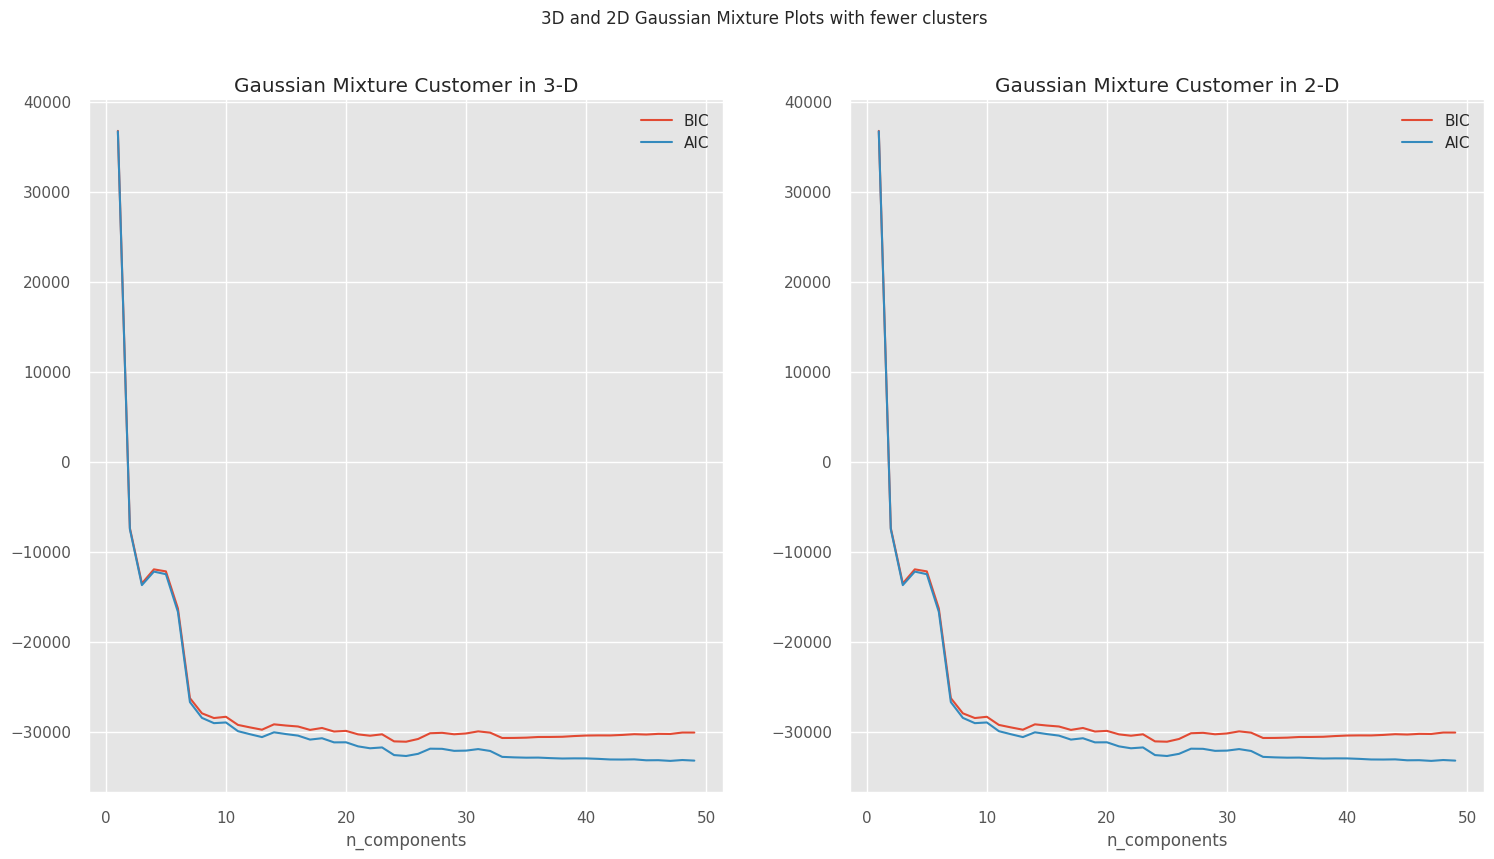

In [141]:
# Plot the output
fig = plt.figure(figsize=(18, 9))
fig.suptitle('3D and 2D Gaussian Mixture Plots with fewer clusters')

d3 = fig.add_subplot(1, 2, 1)
d3.plot(n_components, [m.bic(sales_scaled) for m in models3D], label='BIC')
d3.plot(n_components, [m.aic(sales_scaled) for m in models3D], label='AIC')
d3.legend(loc='best')
d3.set_xlabel('n_components')
d3.set_title('Gaussian Mixture Customer in 3-D');

d2 = fig.add_subplot(1, 2, 2)
d2.plot(n_components, [m.bic(sales_scaled) for m in models2D], label='BIC')
d2.plot(n_components, [m.aic(sales_scaled) for m in models2D], label='AIC')
d2.legend(loc='best')
d2.set_xlabel('n_components')
d2.set_title('Gaussian Mixture Customer in 2-D');

plt.show()

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. Both the AIC and BIC shows that the optimum value is between 40- 50 components which is way too much and difficult to interpret as seen in the Meanshift clustering model so I will probably take the previous deep in the line graph which is between 10 and 20 components.

In [142]:
# lets plot the 40 component GMM
gmm = GaussianMixture(n_components=40).fit(sales_scaled)
labels3D = gmm.predict(sales_scaled)
########################################################################################

# lets plot the 40 component GMM
gmm = GaussianMixture(n_components=40).fit(sales_scaled2)
labels2D = gmm.predict(sales_scaled2)
########################################################################################

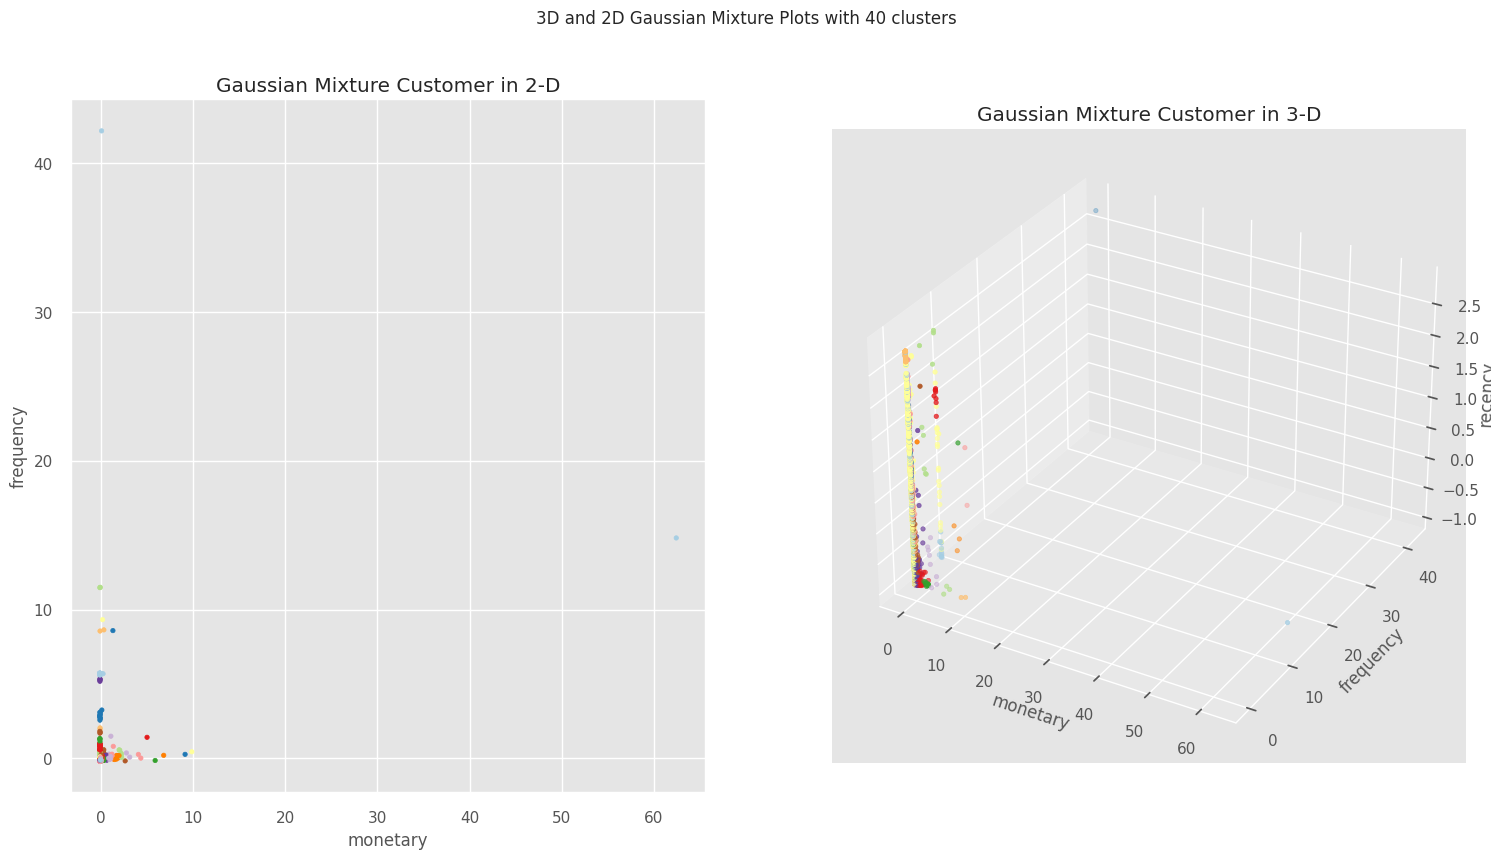

In [143]:
# Plot the output
fig = plt.figure(figsize=(18, 9))
fig.suptitle('3D and 2D Gaussian Mixture Plots with 40 clusters')

# First subplot
d2 = fig.add_subplot(1, 2, 1)
d2.scatter(sales_scaled2[:, 0], sales_scaled2[:, 1], c=labels2D, s=10, cmap='Paired')
d2.set_xlabel('monetary')
d2.set_ylabel('frequency')
d2.set_title('Gaussian Mixture Customer in 2-D')

# Second subplot
d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(sales_scaled[:, 0], sales_scaled[:, 1], sales_scaled[:, 2], c=labels3D, s=10, cmap='Paired')
d3.set_xlabel('monetary')
d3.set_ylabel('frequency')
d3.set_zlabel('recency')
d3.set_title('Gaussian Mixture Customer in 3-D')

plt.show()

#DBSCAN Clustering
DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In [144]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
# Generate sample data

# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=3).fit(sales_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels3D = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels3D)) - (1 if -1 in labels3D else 0)
n_noise_ = list(labels3D).count(-1)

print('3D Estimated number of clusters: %d' % n_clusters_)
print('3D Estimated number of noise points: %d' % n_noise_)
print("3D Silhouette Coefficient: %0.3f" % metrics.silhouette_score(sales_scaled, labels3D))
############################################################################################
db = DBSCAN(eps=0.4, min_samples=3).fit(sales_scaled2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels2D = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels2D)) - (1 if -1 in labels2D else 0)
n_noise_ = list(labels2D).count(-1)

print('2D Estimated number of clusters: %d' % n_clusters_)
print('2D Estimated number of noise points: %d' % n_noise_)
print("2D Silhouette Coefficient: %0.3f" % metrics.silhouette_score(sales_scaled2, labels2D))

3D Estimated number of clusters: 4
3D Estimated number of noise points: 37
3D Silhouette Coefficient: 0.647
2D Estimated number of clusters: 3
2D Estimated number of noise points: 20
2D Silhouette Coefficient: 0.942


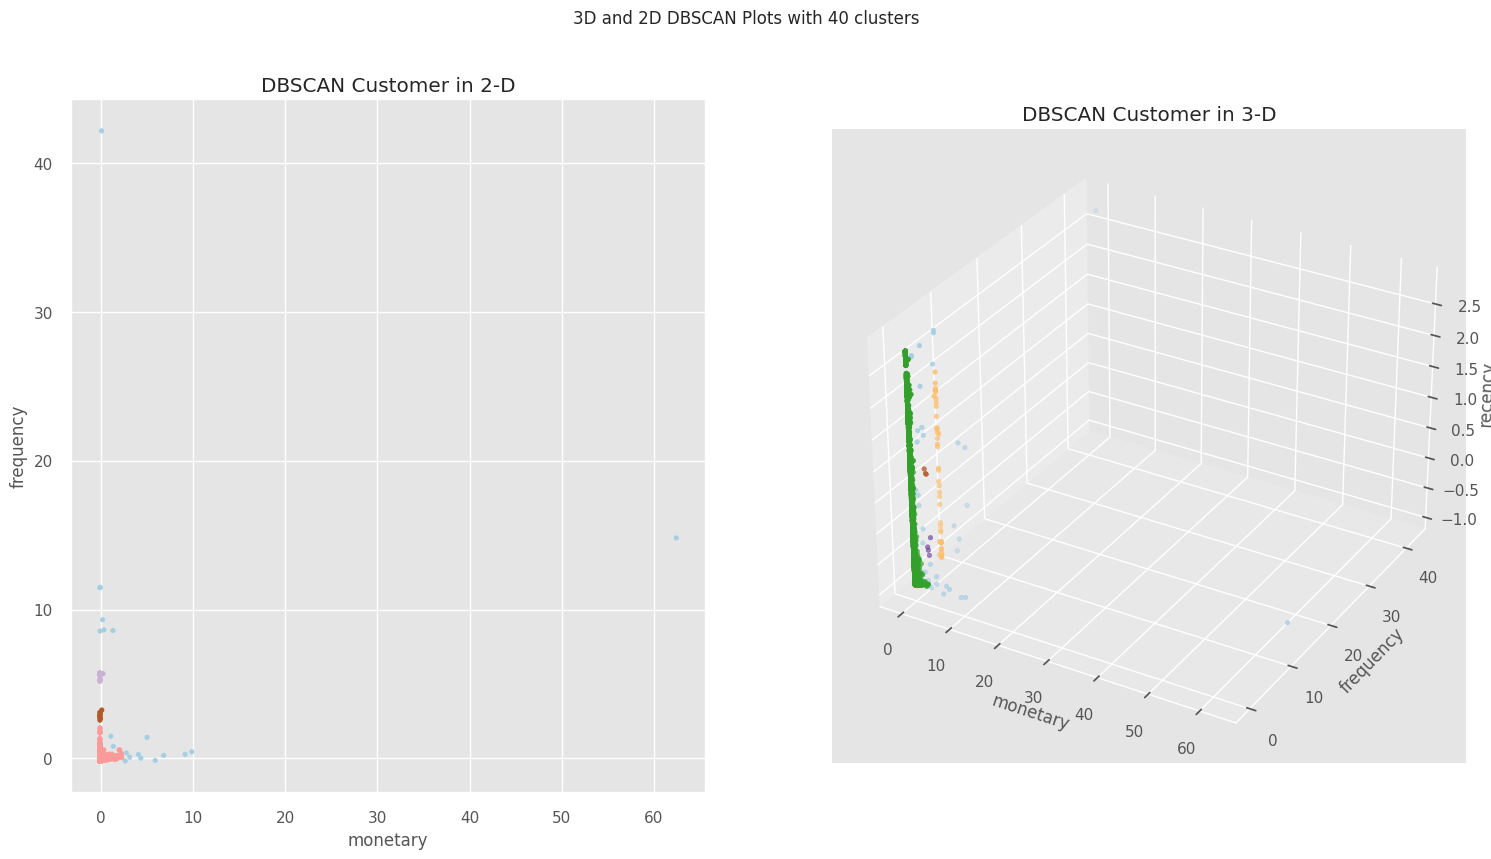

In [145]:
# Plot the output
fig = plt.figure(figsize=(18, 9))
fig.suptitle('3D and 2D DBSCAN Plots with 40 clusters')

# First subplot
d2 = fig.add_subplot(1, 2, 1)
d2.scatter(sales_scaled2[:, 0], sales_scaled2[:, 1], c=labels2D, s=10, cmap='Paired')
d2.set_xlabel('monetary')
d2.set_ylabel('frequency')
#d2.legend(loc='best')
d2.set_title('DBSCAN Customer in 2-D')

# Second subplot
d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(sales_scaled[:, 0], sales_scaled[:, 1], sales_scaled[:, 2], c=labels3D, s=10, cmap='Paired')
d3.set_xlabel('monetary')
d3.set_ylabel('frequency')
d3.set_zlabel('recency')

d3.set_title('DBSCAN Customer in 3-D')
plt.show()

#Model Evaluation

In [146]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans  # Import KMeans

# Assuming you have:
# - sales_scaled: Your scaled data for K-means

# Initialize an empty list to store the KMeans labels
kmeans_labels = []

# Example loop to generate cluster labels for k=2 to k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)  # Create a KMeans instance
    kmeans.fit(sales_scaled)  # Fit the model to your data
    kmeans_labels.append(kmeans.labels_)  # Store the labels


silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for labels in kmeans_labels:
    silhouette_scores.append(silhouette_score(sales_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(sales_scaled, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(sales_scaled, labels))

# Print the scores
for i, k in enumerate(range(2, len(kmeans_labels) + 2)):  # Assuming you started with k=2
    print(f"K-means with k={k}:")
    print(f"  Silhouette Score: {silhouette_scores[i]:.3f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin_scores[i]:.3f}")
    print(f"  Calinski-Harabasz Index: {calinski_harabasz_scores[i]:.3f}")
    print("-" * 20)

K-means with k=2:
  Silhouette Score: 0.856
  Davies-Bouldin Index: 0.651
  Calinski-Harabasz Index: 1192.853
--------------------
K-means with k=3:
  Silhouette Score: 0.700
  Davies-Bouldin Index: 0.599
  Calinski-Harabasz Index: 1962.927
--------------------
K-means with k=4:
  Silhouette Score: 0.702
  Davies-Bouldin Index: 0.345
  Calinski-Harabasz Index: 4959.382
--------------------
K-means with k=5:
  Silhouette Score: 0.704
  Davies-Bouldin Index: 0.264
  Calinski-Harabasz Index: 7482.564
--------------------
K-means with k=6:
  Silhouette Score: 0.614
  Davies-Bouldin Index: 0.336
  Calinski-Harabasz Index: 8595.067
--------------------
K-means with k=7:
  Silhouette Score: 0.624
  Davies-Bouldin Index: 0.364
  Calinski-Harabasz Index: 9750.998
--------------------
K-means with k=8:
  Silhouette Score: 0.530
  Davies-Bouldin Index: 0.429
  Calinski-Harabasz Index: 10738.165
--------------------
K-means with k=9:
  Silhouette Score: 0.517
  Davies-Bouldin Index: 0.452
  Calins